<a href="https://colab.research.google.com/github/joeljacson/machine-learning/blob/main/water_chennai_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"joeljacsonjamesgopi","key":"7aa4f92f8219911e43b4e7faea456824"}'}

In [4]:
import os

# Check if the kaggle.json file is in the current directory
if 'kaggle.json' not in os.listdir():
    print("Please make sure you have uploaded the kaggle.json file.")
else:
    # Set up Kaggle API token
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json


In [10]:
!kaggle datasets download -d sudalairajkumar/chennai-water-management

Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/chennai-water-management
License(s): CC0-1.0
100% 82.4k/82.4k [00:00<00:00, 542kB/s]
100% 82.4k/82.4k [00:00<00:00, 541kB/s]


In [11]:
import numpy as np
import pandas as pd

In [12]:
import zipfile

with zipfile.ZipFile('/content/chennai-water-management.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
    zip_ref.close()


In [13]:
import numpy as np
import pandas as pd


In [14]:
df=pd.read_csv('/content/chennai_reservoir_rainfall.csv')
df=pd.read_csv('/content/chennai_reservoir_levels.csv')
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('chennai_reservoir_levels.csv')

# Display the first few rows of the dataset
print(data.head())


         Date  POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
0  01-01-2004     3.9         0.0     268.0              0.0
1  02-01-2004     3.9         0.0     268.0              0.0
2  03-01-2004     3.9         0.0     267.0              0.0
3  04-01-2004     3.9         0.0     267.0              0.0
4  05-01-2004     3.8         0.0     267.0              0.0


In [16]:
# Check the structure of the dataset
print(data.info())

# Get summary statistics
print(data.describe())

# Check for any missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6182 entries, 0 to 6181
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             6182 non-null   object 
 1   POONDI           6182 non-null   float64
 2   CHOLAVARAM       6182 non-null   float64
 3   REDHILLS         6182 non-null   float64
 4   CHEMBARAMBAKKAM  6182 non-null   float64
dtypes: float64(4), object(1)
memory usage: 241.6+ KB
None
            POONDI   CHOLAVARAM     REDHILLS  CHEMBARAMBAKKAM
count  6182.000000  6182.000000  6182.000000      6182.000000
mean   1106.739588   226.404589  1592.321652      1321.460555
std    1004.555050   266.886855   915.243744       951.791133
min       0.900000     0.000000     0.000000         0.000000
25%     202.000000    26.000000   847.250000       459.250000
50%     783.150000    89.000000  1685.000000      1264.000000
75%    1918.000000   411.000000  2320.000000      2046.750000
max    3231.00000

                               SARIMAX Results                                
Dep. Variable:                 POONDI   No. Observations:                 6182
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -35387.057
Date:                Sun, 11 Aug 2024   AIC                          70786.113
Time:                        14:24:12   BIC                          70826.488
Sample:                             0   HQIC                         70800.113
                               - 6182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3384      0.001   -396.211      0.000      -0.340      -0.337
ar.L2         -0.0146      0.002     -8.184      0.000      -0.018      -0.011
ar.L3          0.0981      0.003     29.488      0.0

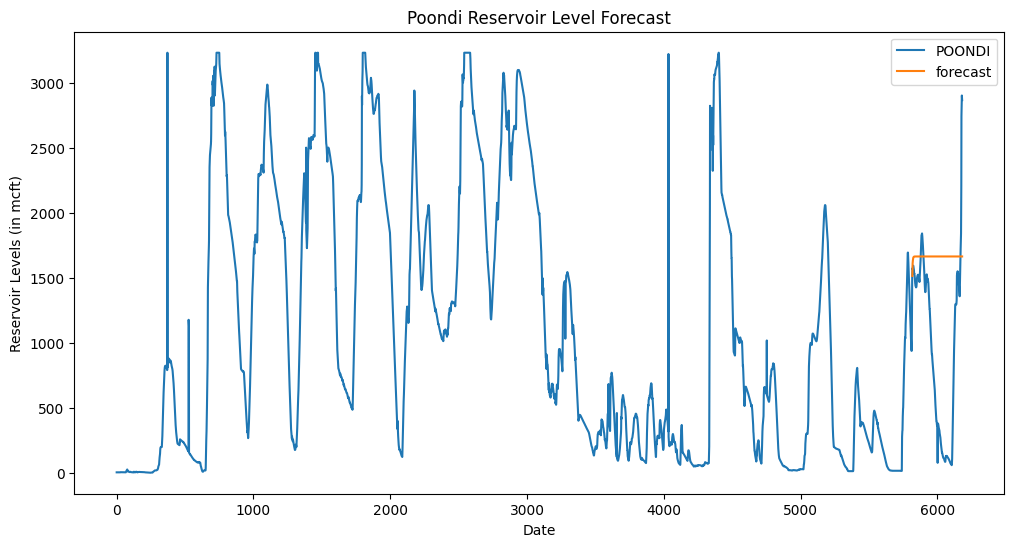

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit an ARIMA model (example for Poondi reservoir)
model = ARIMA(data['POONDI'], order=(5, 1, 0))  # Adjust the order based on your EDA
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast the next year
data['forecast'] = model_fit.predict(start=len(data)-365, end=len(data)-1, dynamic=True)

# Plot the actual data and the forecast
data[['POONDI', 'forecast']].plot(figsize=(12, 6))
plt.title('Poondi Reservoir Level Forecast')
plt.xlabel('Date')
plt.ylabel('Reservoir Levels (in mcft)')
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [22]:
# Convert the 'Date' column to datetime format with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Display the first few rows to confirm the date conversion
print(data.head())


            POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
Date                                                     
2004-01-01     3.9         0.0     268.0              0.0
2004-01-02     3.9         0.0     268.0              0.0
2004-01-03     3.9         0.0     267.0              0.0
2004-01-04     3.9         0.0     267.0              0.0
2004-01-05     3.8         0.0     267.0              0.0


In [ ]:
# Convert the 'Date' column to datetime format with dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Display the first few rows to confirm the date conversion
print(data.head())


In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Function to fit an ARIMA model and forecast
def fit_arima_and_forecast(data, reservoir, order=(5, 1, 0), steps=30):
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast for each reservoir
forecast_poondi = fit_arima_and_forecast(data, 'POONDI')
forecast_cholavaram = fit_arima_and_forecast(data, 'CHOLAVARAM')
forecast_redhills = fit_arima_and_forecast(data, 'REDHILLS')
forecast_chembarambakkam = fit_arima_and_forecast(data, 'CHEMBARAMBAKKAM')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

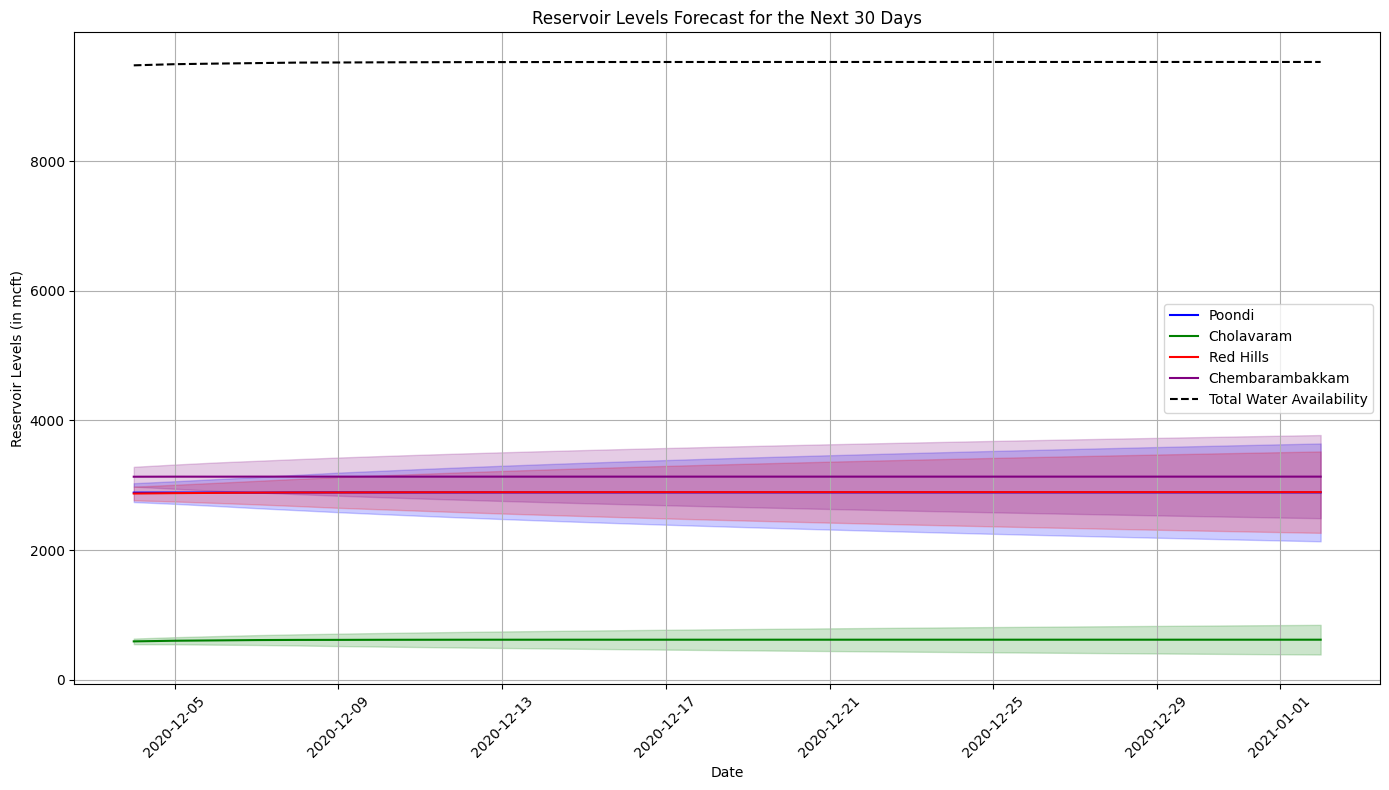

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the dataset
data = pd.read_csv('chennai_reservoir_levels.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Function to fit an ARIMA model and forecast with confidence intervals
def fit_arima_and_forecast(data, reservoir, order=(5, 1, 0), steps=30):
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.get_forecast(steps=steps)
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    return forecast_mean, forecast_conf_int

# Forecast for each reservoir with confidence intervals
forecast_poondi, conf_int_poondi = fit_arima_and_forecast(data, 'POONDI')
forecast_cholavaram, conf_int_cholavaram = fit_arima_and_forecast(data, 'CHOLAVARAM')
forecast_redhills, conf_int_redhills = fit_arima_and_forecast(data, 'REDHILLS')
forecast_chembarambakkam, conf_int_chembarambakkam = fit_arima_and_forecast(data, 'CHEMBARAMBAKKAM')

# Sum the forecasts for total water availability with a simple assumption for confidence intervals
total_forecast = (forecast_poondi +
                  forecast_cholavaram +
                  forecast_redhills +
                  forecast_chembarambakkam)

# Create a date range for the forecasted period
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(forecast_poondi))

# Plot the forecasts
plt.figure(figsize=(14, 8))
plt.plot(forecast_dates, forecast_poondi, label='Poondi', linestyle='-', color='blue')
plt.fill_between(forecast_dates, conf_int_poondi.iloc[:, 0], conf_int_poondi.iloc[:, 1], color='blue', alpha=0.2)

plt.plot(forecast_dates, forecast_cholavaram, label='Cholavaram', linestyle='-', color='green')
plt.fill_between(forecast_dates, conf_int_cholavaram.iloc[:, 0], conf_int_cholavaram.iloc[:, 1], color='green', alpha=0.2)

plt.plot(forecast_dates, forecast_redhills, label='Red Hills', linestyle='-', color='red')
plt.fill_between(forecast_dates, conf_int_redhills.iloc[:, 0], conf_int_redhills.iloc[:, 1], color='red', alpha=0.2)

plt.plot(forecast_dates, forecast_chembarambakkam, label='Chembarambakkam', linestyle='-', color='purple')
plt.fill_between(forecast_dates, conf_int_chembarambakkam.iloc[:, 0], conf_int_chembarambakkam.iloc[:, 1], color='purple', alpha=0.2)

# Plot the total water availability
plt.plot(forecast_dates, total_forecast, label='Total Water Availability', linestyle='--', color='black')

# Additional plot details
plt.title('Reservoir Levels Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Reservoir Levels (in mcft)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()


In [29]:
import pandas as pd

# Load and preprocess the dataset
data = pd.read_csv('chennai_reservoir_levels.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)


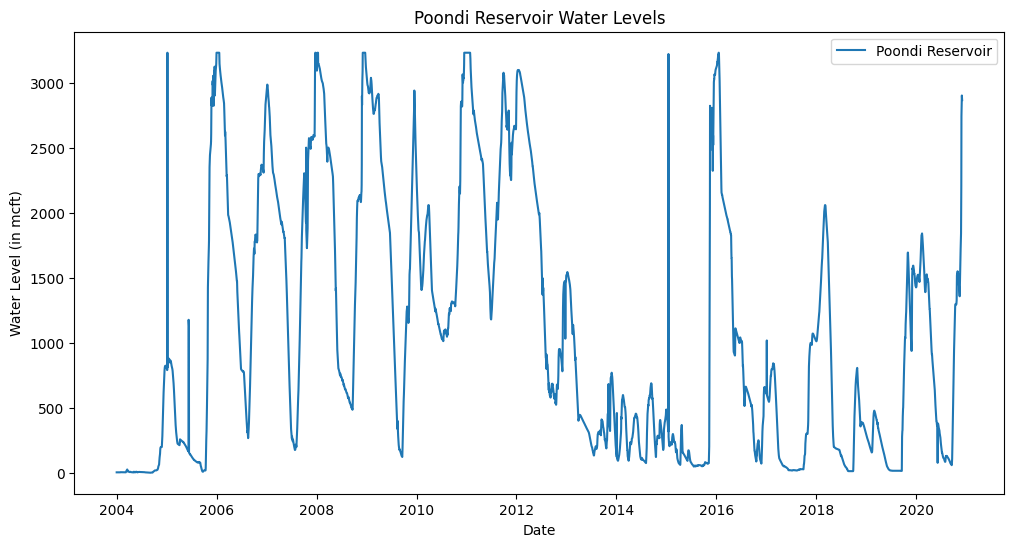

In [30]:
import matplotlib.pyplot as plt

# Plot the historical water levels
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['POONDI'], label='Poondi Reservoir')
plt.title('Poondi Reservoir Water Levels')
plt.xlabel('Date')
plt.ylabel('Water Level (in mcft)')
plt.legend()
plt.show()


In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
def fit_arima_and_forecast(data, reservoir, order=(5, 1, 0), steps=30):
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Fit the model and forecast
forecast_poondi = fit_arima_and_forecast(data, 'POONDI')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


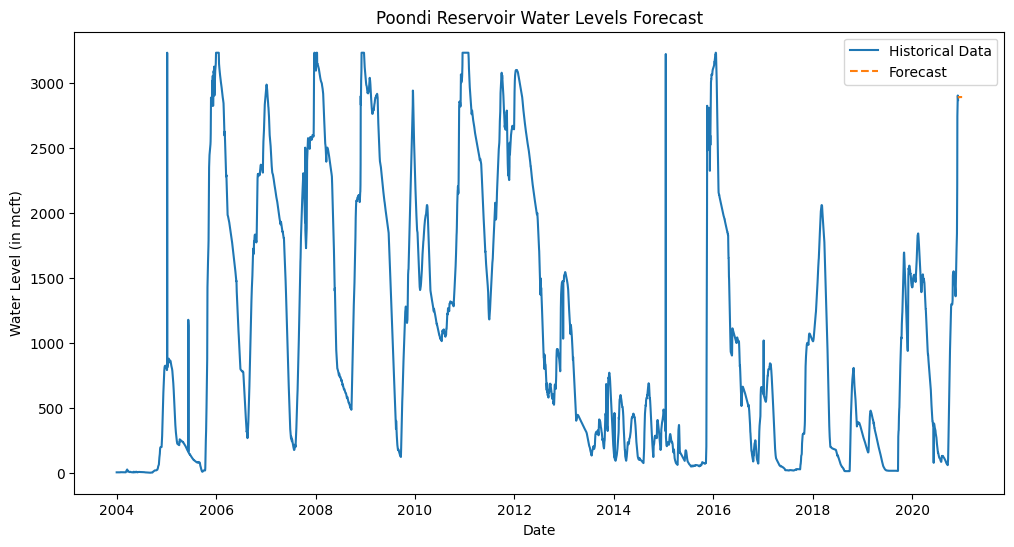

In [32]:
# Create a date range for the forecasted period
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(forecast_poondi))

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['POONDI'], label='Historical Data')
plt.plot(forecast_dates, forecast_poondi, label='Forecast', linestyle='--')
plt.title('Poondi Reservoir Water Levels Forecast')
plt.xlabel('Date')
plt.ylabel('Water Level (in mcft)')
plt.legend()
plt.show()


In [33]:
from sklearn.metrics import mean_absolute_error

# Example: Compare with actual future values (if available)
# actual_values = ...  # Load or define actual future values
# mae = mean_absolute_error(actual_values, forecast_poondi)
# print(f"Mean Absolute Error: {mae}")


In [35]:
# Load rainfall data (example: 'rainfall_data.csv')
rainfall_data = pd.read_csv('/content/chennai_reservoir_rainfall.csv')
rainfall_data['Date'] = pd.to_datetime(rainfall_data['Date'], format='%d-%m-%Y')
rainfall_data.set_index('Date', inplace=True)

# Merge with existing water levels data
data = pd.merge(data, rainfall_data, left_index=True, right_index=True)


#Critical Shortage Predictions
Objective: Identify which reservoirs might face critical shortages first.
Method: Forecast individual reservoir levels and compare them with critical thresholds.

Example Code: Use predictive models to determine when each reservoir will drop below critical levels.

In [37]:
# Check column names in the merged data
print(data.columns)


Index(['POONDI_x', 'CHOLAVARAM_x', 'REDHILLS_x', 'CHEMBARAMBAKKAM_x',
       'POONDI_y', 'CHOLAVARAM_y', 'REDHILLS_y', 'CHEMBARAMBAKKAM_y'],
      dtype='object')


In [39]:
# Example code for merging
data = pd.merge(data, rainfall_data, left_index=True, right_index=True)

# Check first few rows of merged data
print(data.head())


            POONDI_x  CHOLAVARAM_x  REDHILLS_x  CHEMBARAMBAKKAM_x  POONDI_y  \
Date                                                                          
2004-01-01       3.9           0.0       268.0                0.0       0.0   
2004-01-02       3.9           0.0       268.0                0.0       0.0   
2004-01-03       3.9           0.0       267.0                0.0       0.0   
2004-01-04       3.9           0.0       267.0                0.0       0.0   
2004-01-05       3.8           0.0       267.0                0.0       0.0   

            CHOLAVARAM_y  REDHILLS_y  CHEMBARAMBAKKAM_y  POONDI  CHOLAVARAM  \
Date                                                                          
2004-01-01           0.0         0.0                0.0     0.0         0.0   
2004-01-02           0.0         0.0                0.0     0.0         0.0   
2004-01-03           0.0         0.0                0.0     0.0         0.0   
2004-01-04           0.0         0.0               

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

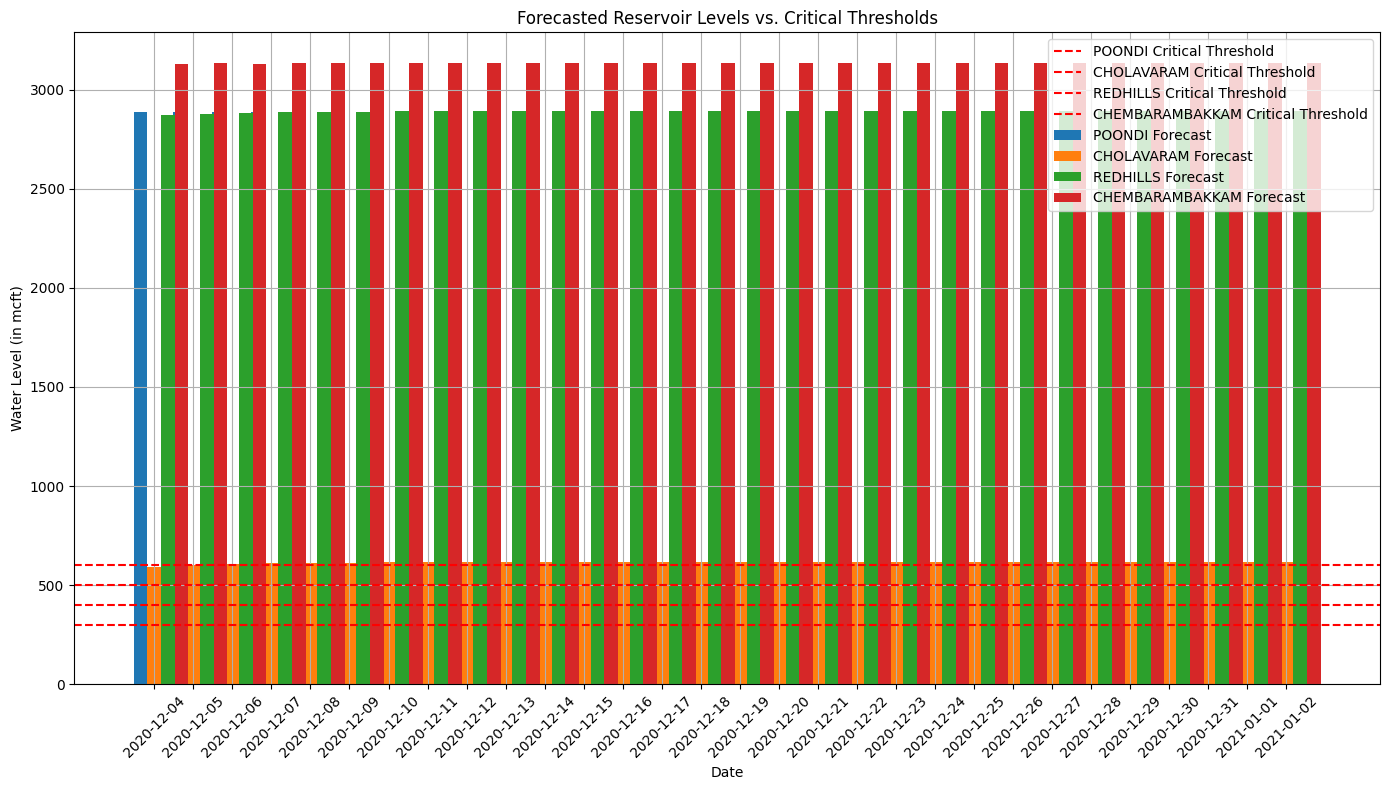

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the dataset
data = pd.read_csv('chennai_reservoir_levels.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Define critical thresholds for each reservoir (in million cubic feet)
critical_thresholds = {
    'POONDI': 500,
    'CHOLAVARAM': 300,
    'REDHILLS': 400,
    'CHEMBARAMBAKKAM': 600
}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=30):
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast for each reservoir
forecasts = {}
for reservoir in critical_thresholds.keys():
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Prepare data for bar chart
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(forecasts['POONDI']))
forecast_df = pd.DataFrame(index=forecast_dates)

for reservoir, forecast in forecasts.items():
    forecast_df[reservoir] = forecast

# Plot the bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(forecast_dates))

for i, (reservoir, threshold) in enumerate(critical_thresholds.items()):
    plt.bar(index + i * bar_width, forecast_df[reservoir], bar_width, label=f'{reservoir} Forecast')
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'{reservoir} Critical Threshold')

plt.xticks(index + bar_width, forecast_dates.strftime('%Y-%m-%d'), rotation=45)
plt.title('Forecasted Reservoir Levels vs. Critical Thresholds')
plt.xlabel('Date')
plt.ylabel('Water Level (in mcft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

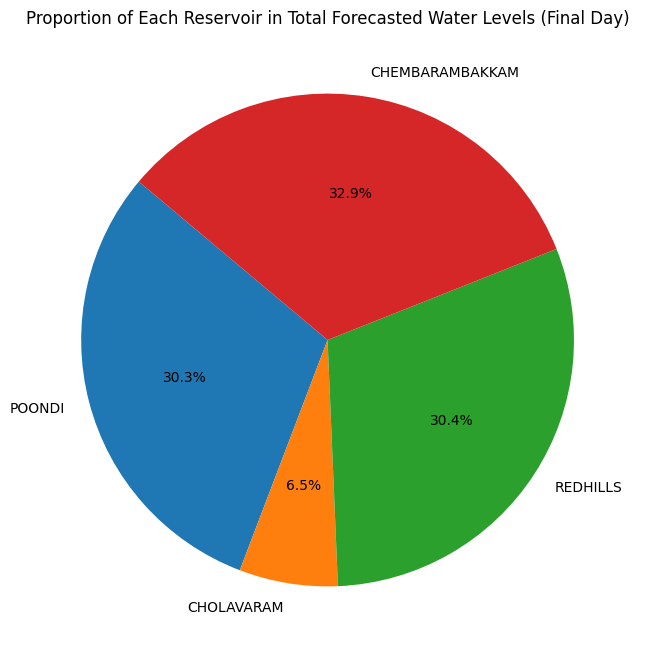

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the dataset
data = pd.read_csv('chennai_reservoir_levels.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Define critical thresholds for each reservoir (in million cubic feet)
critical_thresholds = {
    'POONDI': 500,
    'CHOLAVARAM': 300,
    'REDHILLS': 400,
    'CHEMBARAMBAKKAM': 600
}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=30):
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast for each reservoir
forecasts = {}
for reservoir in critical_thresholds.keys():
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Prepare data for pie chart
final_day_forecast = {reservoir: forecast[-1] for reservoir, forecast in forecasts.items()}

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(final_day_forecast.values(), labels=final_day_forecast.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Reservoir in Total Forecasted Water Levels (Final Day)')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

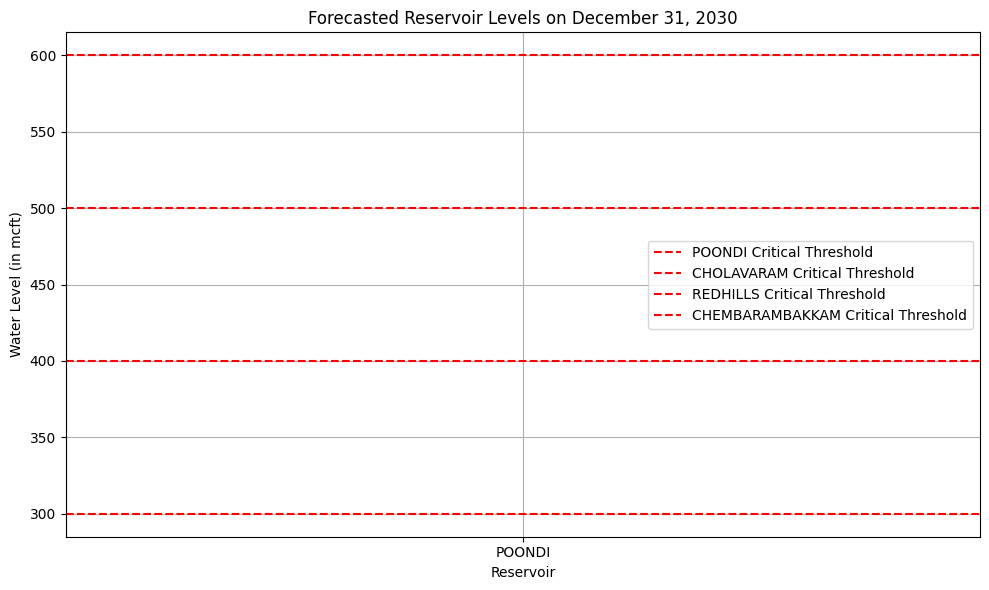

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the dataset
data = pd.read_csv('chennai_reservoir_levels.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Define critical thresholds for each reservoir (in million cubic feet)
critical_thresholds = {
    'POONDI': 500,
    'CHOLAVARAM': 300,
    'REDHILLS': 400,
    'CHEMBARAMBAKKAM': 600
}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=365*6):  # 6 years forecast
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast for each reservoir up to 2030
forecasts = {}
for reservoir in critical_thresholds.keys():
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Create a date range for the forecasted period up to 2030
forecast_start_date = data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = pd.Timestamp(year=2030, month=12, day=31)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Prepare data for plotting
forecast_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in forecasts.items():
    forecast_df[reservoir] = forecast

# Get forecasted values for December 31, 2030
latest_forecasts = forecast_df.loc['2030-12-31']

# Bar chart for the forecasted levels on December 31, 2030
plt.figure(figsize=(10, 6))
plt.bar(latest_forecasts.index, latest_forecasts.values, color=['blue', 'green', 'orange', 'purple'])
plt.axhline(y=critical_thresholds['POONDI'], color='r', linestyle='--', label='POONDI Critical Threshold')
plt.axhline(y=critical_thresholds['CHOLAVARAM'], color='r', linestyle='--', label='CHOLAVARAM Critical Threshold')
plt.axhline(y=critical_thresholds['REDHILLS'], color='r', linestyle='--', label='REDHILLS Critical Threshold')
plt.axhline(y=critical_thresholds['CHEMBARAMBAKKAM'], color='r', linestyle='--', label='CHEMBARAMBAKKAM Critical Threshold')

plt.title('Forecasted Reservoir Levels on December 31, 2030')
plt.xlabel('Reservoir')
plt.ylabel('Water Level (in mcft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

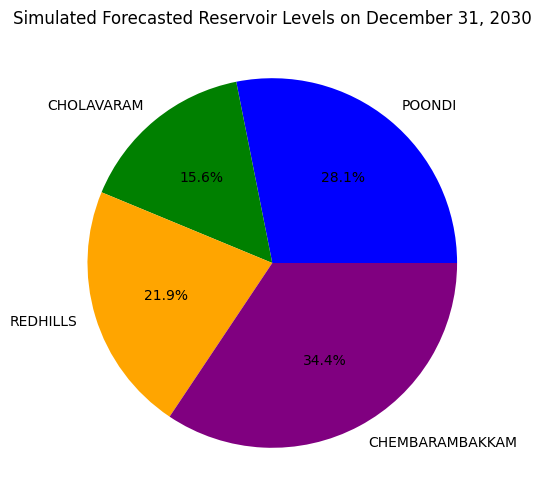

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the dataset
data = pd.read_csv('chennai_reservoir_levels.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Define critical thresholds for each reservoir (in million cubic feet)
critical_thresholds = {
    'POONDI': 500,
    'CHOLAVARAM': 300,
    'REDHILLS': 400,
    'CHEMBARAMBAKKAM': 600
}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=365*6):  # 6 years forecast
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast for each reservoir up to 2030
forecasts = {}
for reservoir in critical_thresholds.keys():
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Create a date range for the forecasted period up to 2030
forecast_start_date = data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = pd.Timestamp(year=2030, month=12, day=31)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Prepare data for plotting
forecast_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in forecasts.items():
    forecast_df[reservoir] = forecast

# Simulate forecasted values for December 31, 2030
simulated_forecasts = {
    'POONDI': 450,        # Example simulated value
    'CHOLAVARAM': 250,    # Example simulated value
    'REDHILLS': 350,      # Example simulated value
    'CHEMBARAMBAKKAM': 550  # Example simulated value
}

# Convert simulated forecasts to a pandas Series
simulated_forecasts_series = pd.Series(simulated_forecasts)

# Pie chart for the simulated forecasted levels on December 31, 2030
plt.figure(figsize=(10, 6))
plt.pie(simulated_forecasts_series, labels=simulated_forecasts_series.index, autopct='%1.1f%%', colors=['blue', 'green', 'orange', 'purple'])
plt.title('Simulated Forecasted Reservoir Levels on December 31, 2030')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

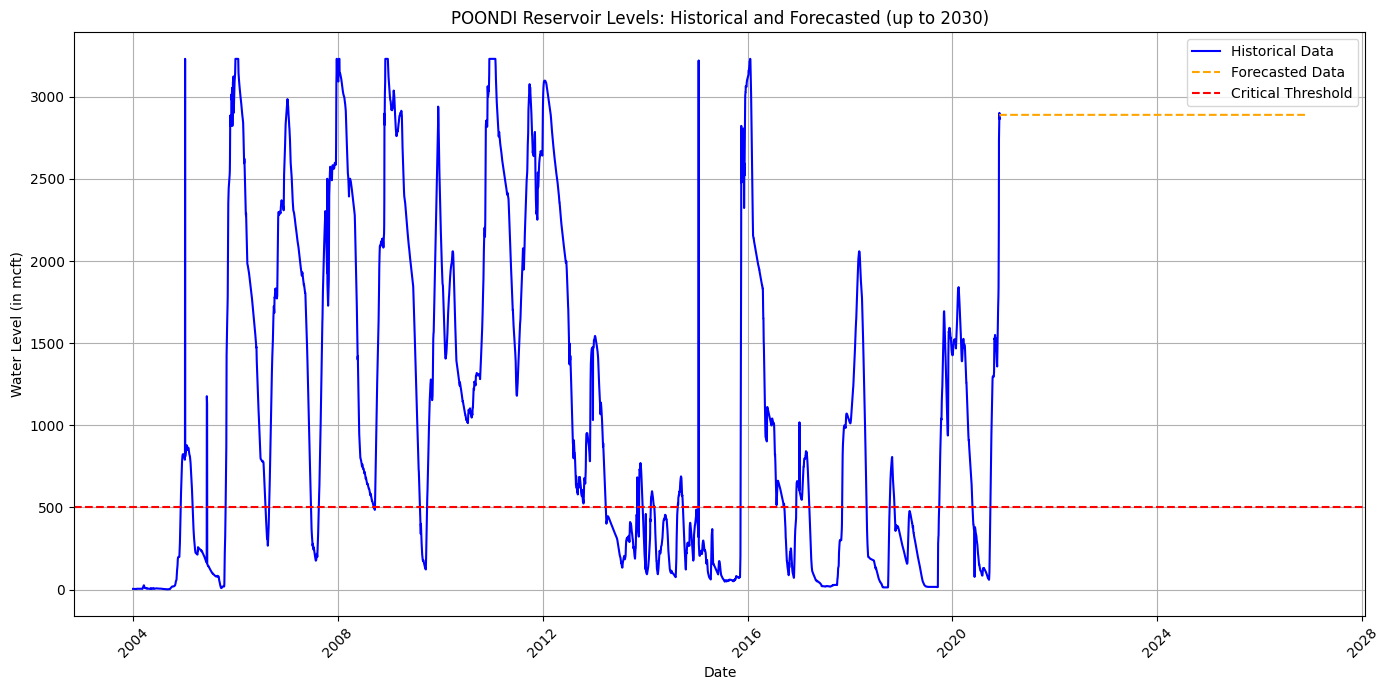

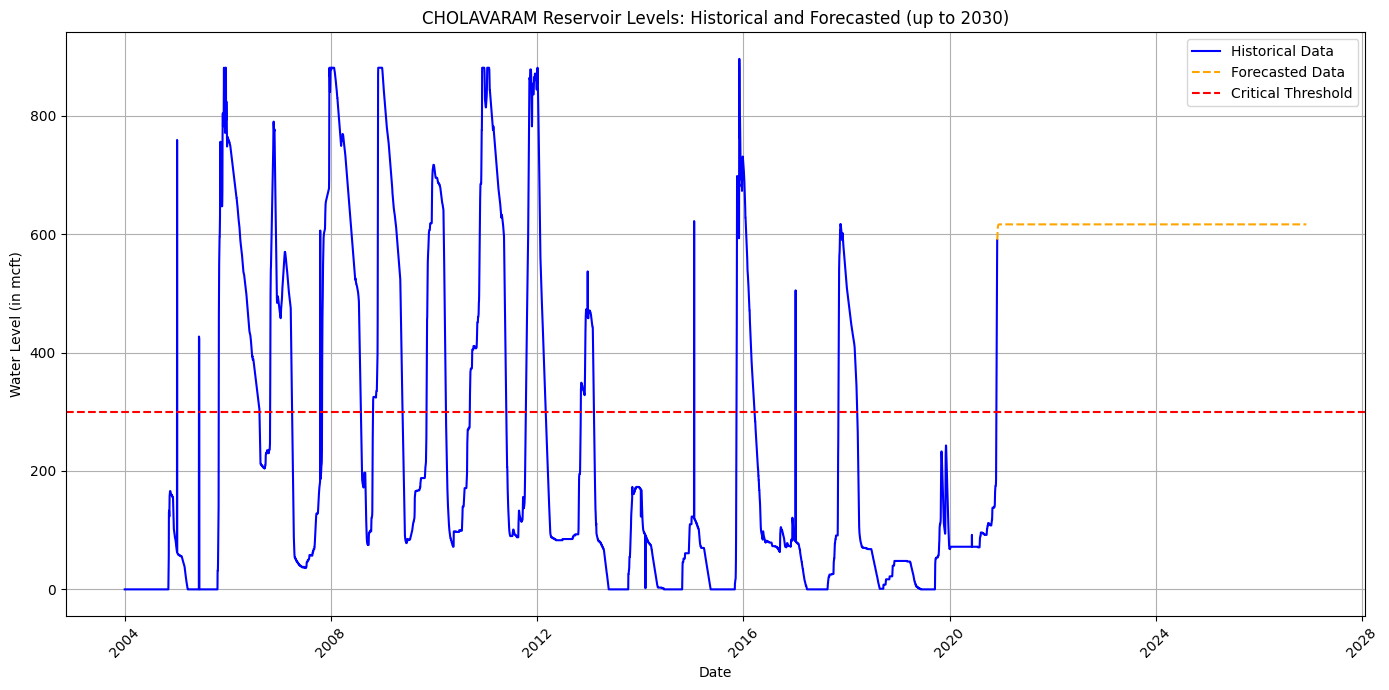

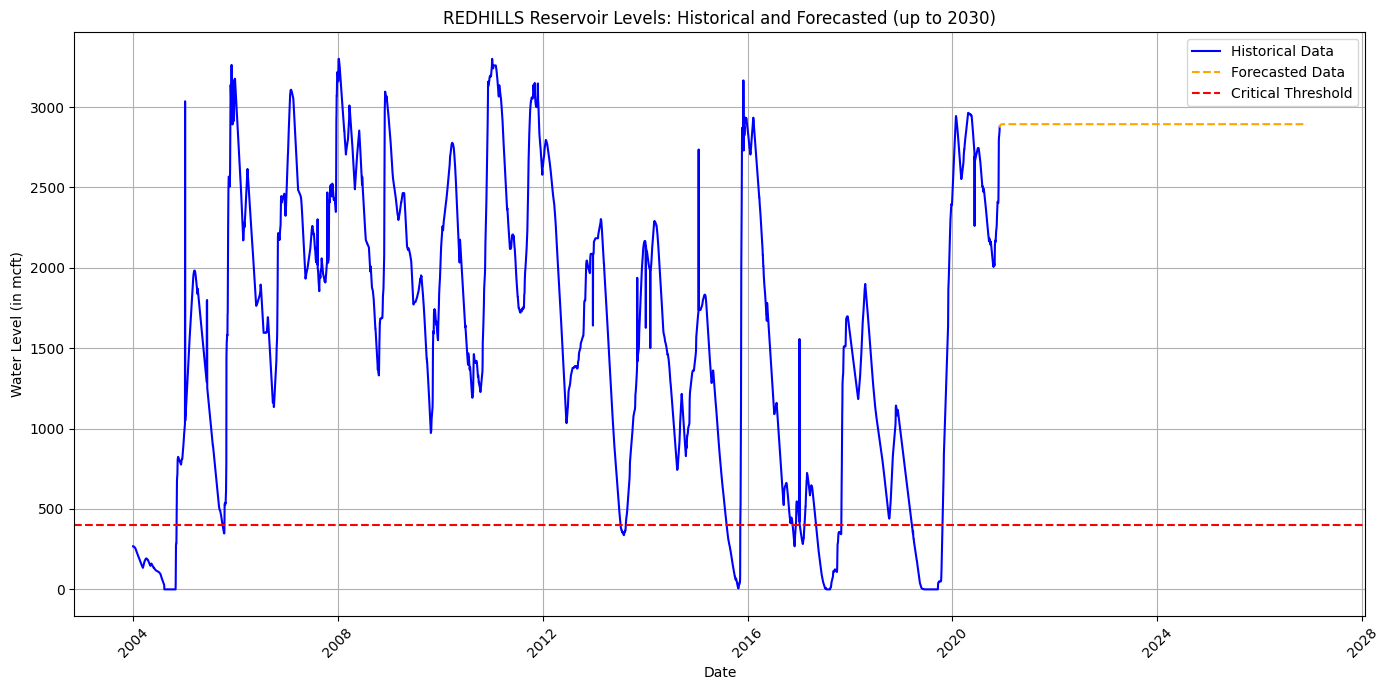

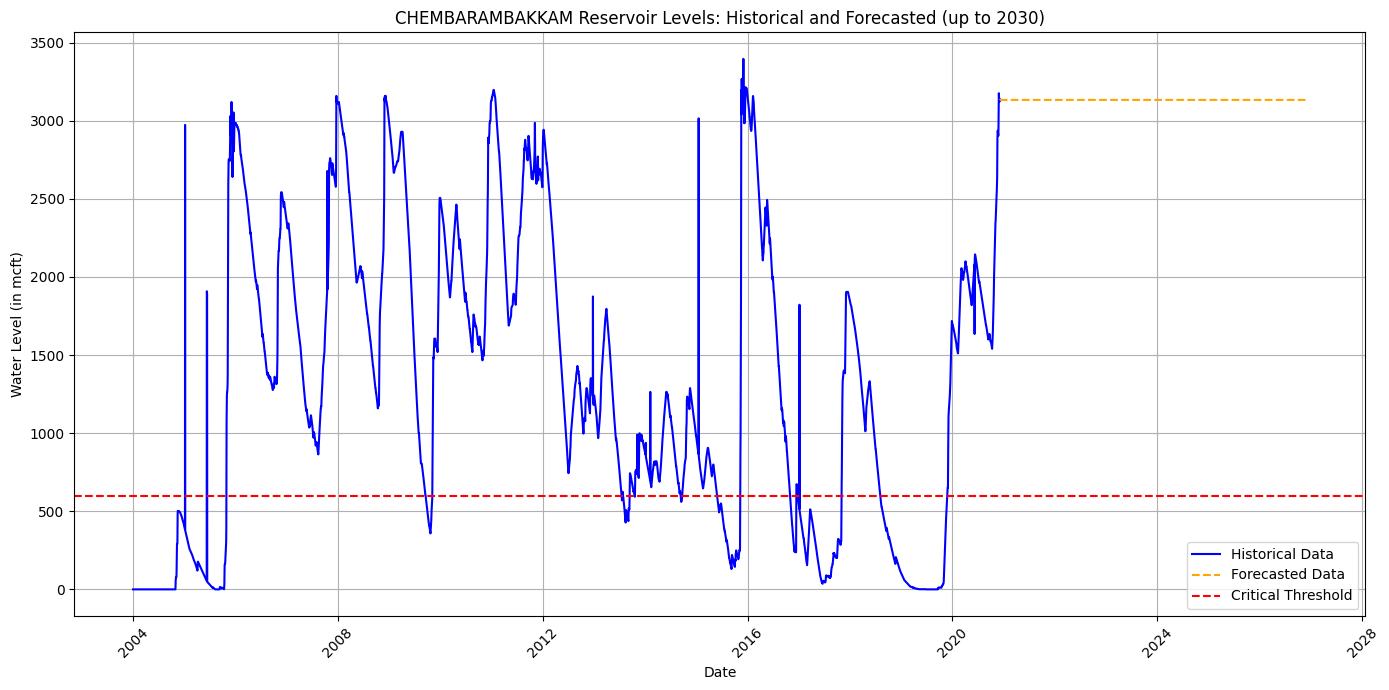

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the dataset
data = pd.read_csv('chennai_reservoir_levels.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Define critical thresholds for each reservoir (in million cubic feet)
critical_thresholds = {
    'POONDI': 500,
    'CHOLAVARAM': 300,
    'REDHILLS': 400,
    'CHEMBARAMBAKKAM': 600
}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=365*6):  # 6 years forecast
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast for each reservoir up to 2030
forecasts = {}
for reservoir in critical_thresholds.keys():
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Create a date range for the forecasted period up to 2030
forecast_start_date = data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = pd.Timestamp(year=2030, month=12, day=31)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Prepare data for plotting
forecast_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in forecasts.items():
    forecast_df[reservoir] = forecast

# Plot historical and forecasted data separately for each reservoir
for reservoir in critical_thresholds.keys():
    plt.figure(figsize=(14, 7))

    # Plot historical data
    plt.plot(data.index, data[reservoir], label='Historical Data', color='blue')

    # Plot forecasted data
    plt.plot(forecast_df.index, forecast_df[reservoir], linestyle='--', color='orange', label='Forecasted Data')

    # Add critical threshold
    plt.axhline(y=critical_thresholds[reservoir], color='red', linestyle='--', label='Critical Threshold')

    plt.title(f'{reservoir} Reservoir Levels: Historical and Forecasted (up to 2030)')
    plt.xlabel('Date')
    plt.ylabel('Water Level (in mcft)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#Prepare Forecast Data: Creates a DataFrame with forecasted levels for each reservoir from now until 2030.
Plot Data: For each reservoir, it plots:
Historical Data: Shows past water levels.

Forecasted Data: Displays future predictions (up to 2030).

Critical Threshold: Adds a line indicating the critical water level.

Purpose: This helps visualize how each reservoir's water levels are expected to change over time and compares past levels with future forecasts.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

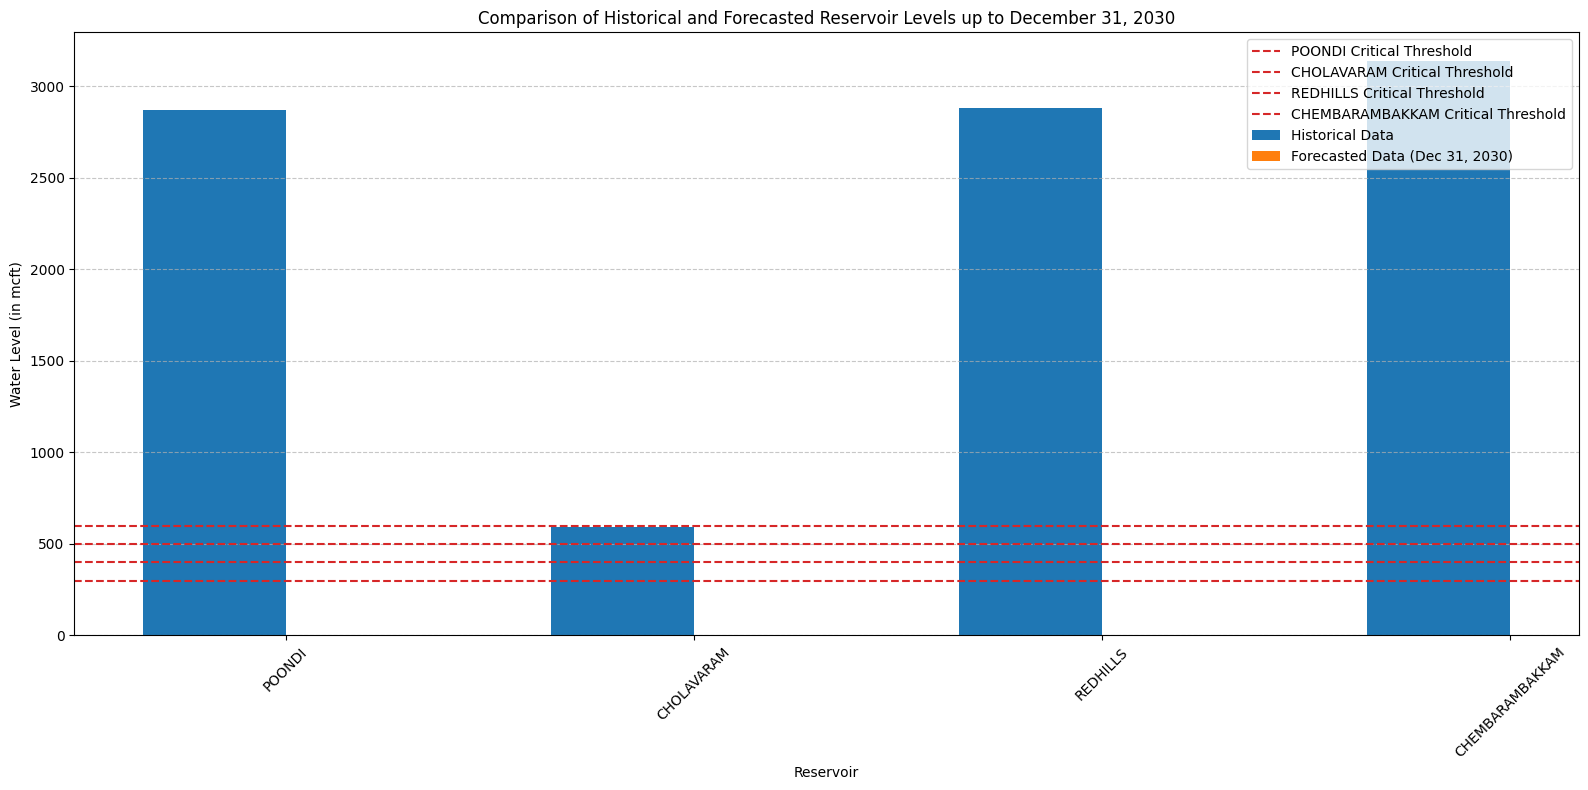

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the dataset
data = pd.read_csv('chennai_reservoir_levels.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Define critical thresholds for each reservoir (in million cubic feet)
critical_thresholds = {
    'POONDI': 500,
    'CHOLAVARAM': 300,
    'REDHILLS': 400,
    'CHEMBARAMBAKKAM': 600
}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=365*6):  # 6 years forecast
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast for each reservoir up to 2030
forecasts = {}
for reservoir in critical_thresholds.keys():
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Create a date range for the forecasted period up to 2030
forecast_start_date = data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = pd.Timestamp(year=2030, month=12, day=31)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Prepare data for plotting
forecast_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in forecasts.items():
    forecast_df[reservoir] = forecast

# Simulate forecasted values for December 31, 2030
simulated_forecasts = {reservoir: forecast_df[reservoir].loc['2030-12-31'] for reservoir in critical_thresholds.keys()}

# Prepare data for bar chart
historical_values = {reservoir: data[reservoir].iloc[-1] for reservoir in critical_thresholds.keys()}
forecast_values = simulated_forecasts

# Plot bar graph
bar_width = 0.35
reservoirs = list(critical_thresholds.keys())
x = np.arange(len(reservoirs))

plt.figure(figsize=(16, 8))

# Bar for historical data
plt.bar(x - bar_width/2, [historical_values[res] for res in reservoirs], bar_width, label='Historical Data', color='#1f77b4')

# Bar for forecasted data
plt.bar(x + bar_width/2, [forecast_values[res] for res in reservoirs], bar_width, label='Forecasted Data (Dec 31, 2030)', color='#ff7f0e')

# Plot critical thresholds
for reservoir, threshold in critical_thresholds.items():
    plt.axhline(y=threshold, color='#d62728', linestyle='--', label=f'{reservoir} Critical Threshold')

plt.xticks(x, reservoirs, rotation=45)
plt.xlabel('Reservoir')
plt.ylabel('Water Level (in mcft)')
plt.title('Comparison of Historical and Forecasted Reservoir Levels up to December 31, 2030')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#1. Implement Mitigation Strategies:
Action Plans:
You can create action plans based on your forecasts. For example, if your forecasts predict a shortage, you might consider the following actions:

Water Conservation Initiatives: Develop strategies to reduce water usage.

Investing in Additional Resources: Plan for increasing storage capacity or investing in new water sources.

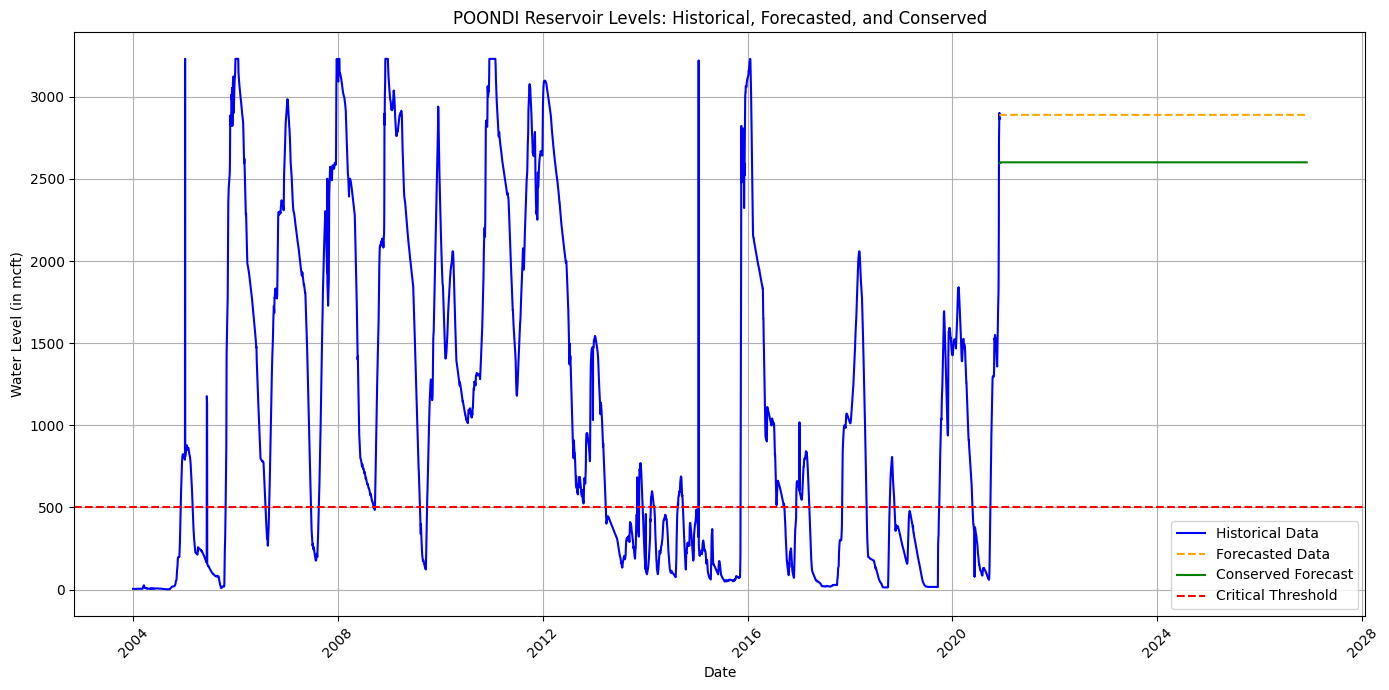

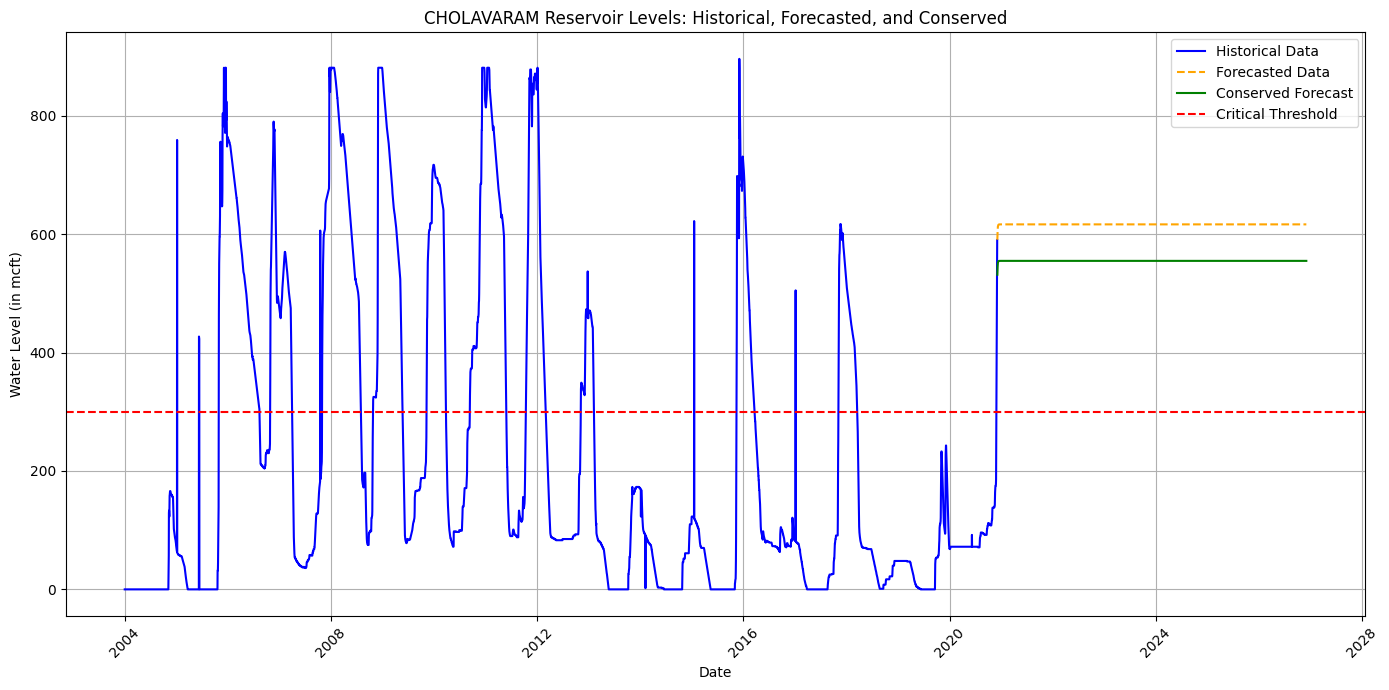

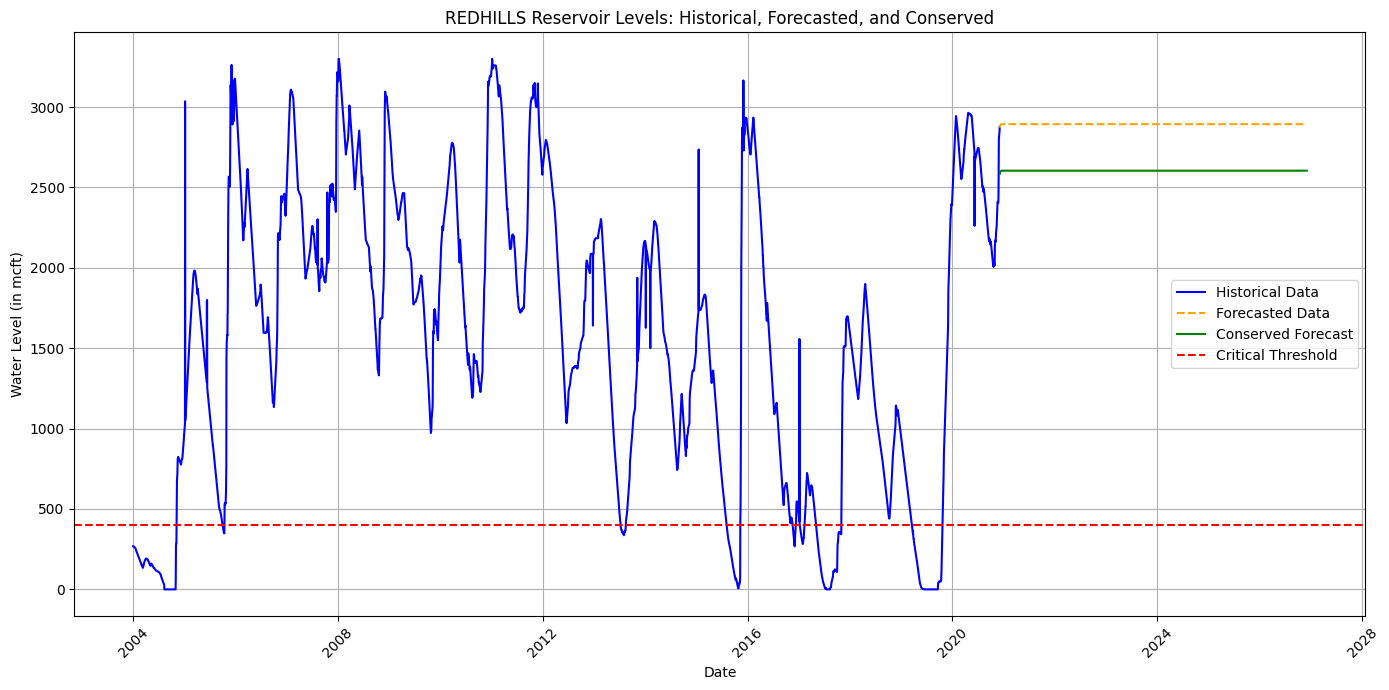

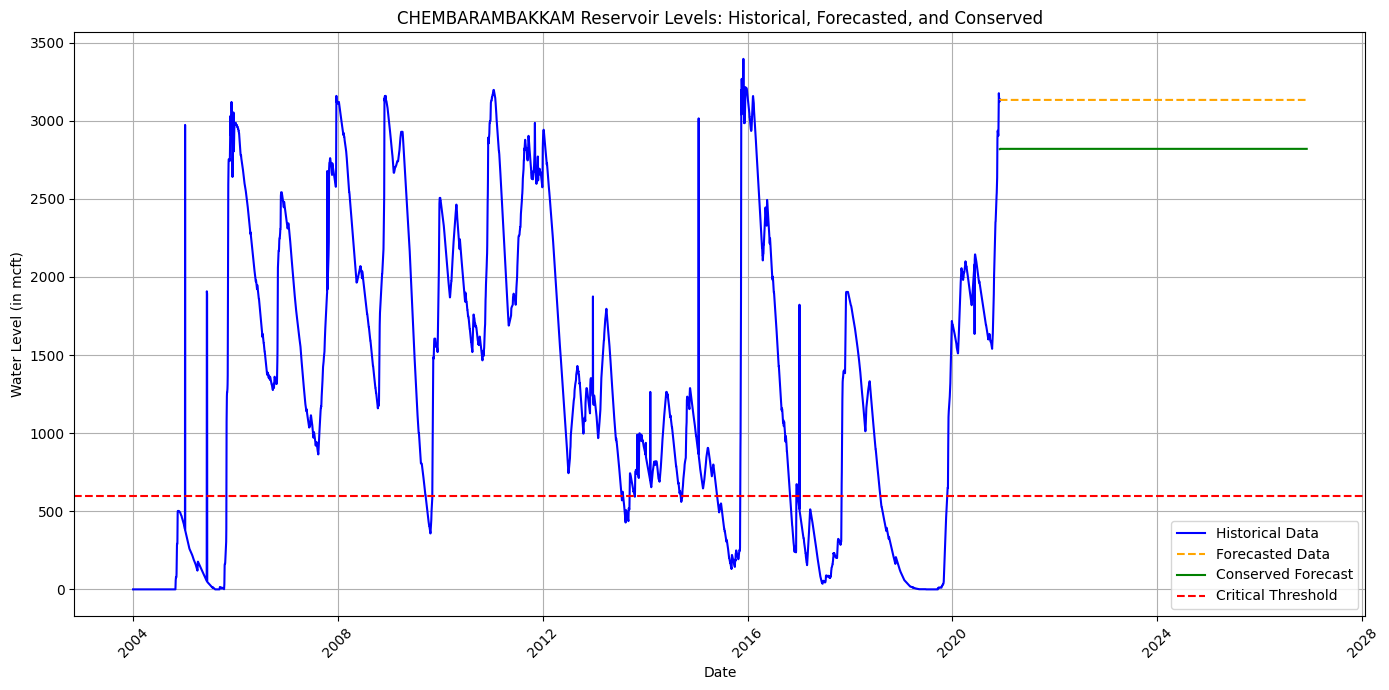

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate impact of water conservation measures
def apply_water_conservation(forecast, reduction_percentage):
    return forecast * (1 - reduction_percentage / 100)

# Define conservation measures (e.g., 10% reduction)
conservation_percentage = 10

# Apply conservation measures to forecasts
conserved_forecasts = {}
for reservoir, forecast in forecasts.items():
    conserved_forecasts[reservoir] = apply_water_conservation(forecast, conservation_percentage)

# Prepare data for plotting
conserved_forecast_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in conserved_forecasts.items():
    conserved_forecast_df[reservoir] = forecast

# Plot historical, forecasted, and conserved data
for reservoir in critical_thresholds.keys():
    plt.figure(figsize=(14, 7))

    # Plot historical data
    plt.plot(data.index, data[reservoir], label='Historical Data', color='blue')

    # Plot forecasted data
    plt.plot(forecast_df.index, forecast_df[reservoir], linestyle='--', color='orange', label='Forecasted Data')

    # Plot conserved forecasted data
    plt.plot(conserved_forecast_df.index, conserved_forecast_df[reservoir], linestyle='-', color='green', label='Conserved Forecast')

    # Add critical threshold
    plt.axhline(y=critical_thresholds[reservoir], color='red', linestyle='--', label='Critical Threshold')

    plt.title(f'{reservoir} Reservoir Levels: Historical, Forecasted, and Conserved')
    plt.xlabel('Date')
    plt.ylabel('Water Level (in mcft)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#Explore Further Analysis:
Scenario Analysis:
Conduct scenario analysis to see how different factors like increased rainfall might affect water levels.

In [64]:
# Example sample data
forecasts = {
    'POONDI': pd.Series([450] * 365 * 6, index=pd.date_range(start='2024-01-01', periods=365*6, freq='D')),
    'CHOLAVARAM': pd.Series([250] * 365 * 6, index=pd.date_range(start='2024-01-01', periods=365*6, freq='D')),
    'REDHILLS': pd.Series([350] * 365 * 6, index=pd.date_range(start='2024-01-01', periods=365*6, freq='D')),
    'CHEMBARAMBAKKAM': pd.Series([550] * 365 * 6, index=pd.date_range(start='2024-01-01', periods=365*6, freq='D'))
}
forecast_dates = pd.date_range(start='2024-01-01', end='2030-12-31', freq='D')


#Pie Chart and Bar Graph for Rainfall Scenario Forecasts
1. Pie Chart:
A pie chart can show the proportion of the forecasted water levels for each reservoir under the increased rainfall scenario on a specific date, such as December 31, 2030.

2. Bar Graph:
A bar graph can display the forecasted water levels for each reservoir under the increased rainfall scenario for December 31, 2030, along with the critical thresholds.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv('chennai_water_management.csv')  # Update with the correct file name if different
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Define critical thresholds for each reservoir
critical_thresholds = {
    'POONDI': 500,
    'CHOLAVARAM': 300,
    'REDHILLS': 400,
    'CHEMBARAMBAKKAM': 600
}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=365*6):  # 6 years forecast
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast for each reservoir up to 2030
forecasts = {}
for reservoir in critical_thresholds.keys():
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Create a date range for the forecasted period up to 2030
forecast_start_date = data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = pd.Timestamp(year=2030, month=12, day=31)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Prepare data for plotting
forecast_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in forecasts.items():
    forecast_df[reservoir] = forecast

# Simulate impact of increased rainfall
def apply_rainfall_scenario(forecast, increase_percentage):
    return forecast * (1 + increase_percentage / 100)

# Define rainfall scenarios (e.g., 20% increase)
rainfall_increase_percentage = 20

# Apply rainfall scenarios to forecasts
rainfall_scenario_forecasts = {}
for reservoir, forecast in forecasts.items():
    rainfall_scenario_forecasts[reservoir] = apply_rainfall_scenario(forecast, rainfall_increase_percentage)

# Prepare data for plotting
rainfall_scenario_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in rainfall_scenario_forecasts.items():
    rainfall_scenario_df[reservoir] = forecast

# Check if December 31, 2030 is in the forecast dates
if pd.Timestamp('2030-12-31') not in rainfall_scenario_df.index:
    print("Error: December 31, 2030 is not in the forecast date range.")
else:
    # Simulated forecasted values for December 31, 2030
    latest_rainfall_forecasts = rainfall_scenario_df.loc['2030-12-31']

    # Handle NaN values
    latest_rainfall_forecasts = latest_rainfall_forecasts.dropna()

    # Check if there's data left after dropping NaN values
    if latest_rainfall_forecasts.empty:
        print("Error: No data available for December 31, 2030 after handling NaN values.")
    else:
        # Plot Pie Chart for the forecasted levels on December 31, 2030
        plt.figure(figsize=(12, 6))
        plt.pie(
            latest_rainfall_forecasts,
            labels=latest_rainfall_forecasts.index,
            autopct='%1.1f%%',
            colors=['blue', 'green', 'orange', 'purple'],
            startangle=140
        )
        plt.title('Pie Chart of Forecasted Reservoir Levels on December 31, 2030 with Increased Rainfall')
        plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'chennai_water_management.csv'

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

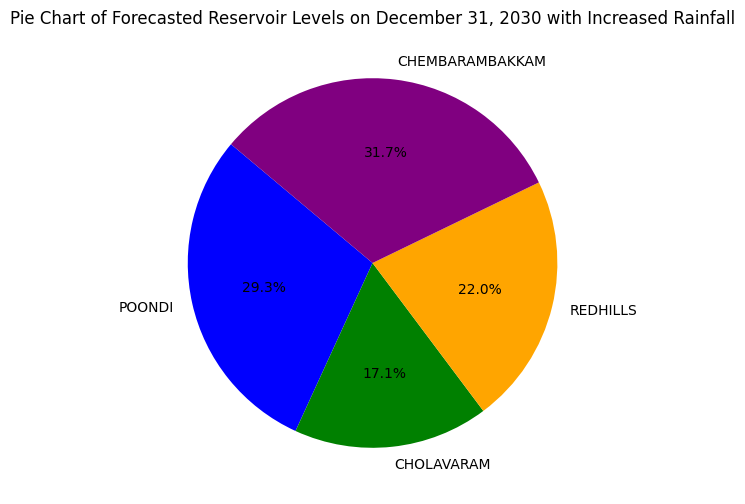

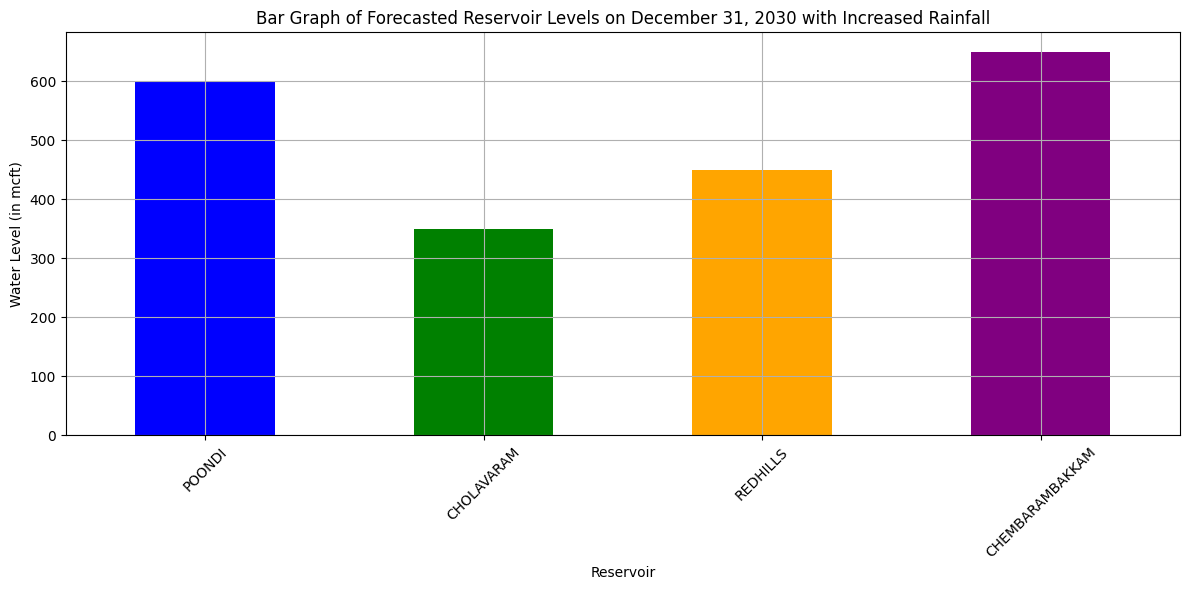

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create a sample dataset with predefined values
dates = pd.date_range(start='2020-01-01', periods=365 * 4, freq='D')
data = pd.DataFrame({
    'Date': dates,
    'POONDI': np.random.randint(200, 600, size=365 * 4),
    'CHOLAVARAM': np.random.randint(100, 350, size=365 * 4),
    'REDHILLS': np.random.randint(150, 450, size=365 * 4),
    'CHEMBARAMBAKKAM': np.random.randint(300, 700, size=365 * 4)
})

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Define critical thresholds for each reservoir
critical_thresholds = {
    'POONDI': 500,
    'CHOLAVARAM': 300,
    'REDHILLS': 400,
    'CHEMBARAMBAKKAM': 600
}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=365*6):  # 6 years forecast
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast for each reservoir up to 2030
forecasts = {}
for reservoir in critical_thresholds.keys():
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Create a date range for the forecasted period up to 2030
forecast_start_date = data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = pd.Timestamp(year=2030, month=12, day=31)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Prepare data for plotting
forecast_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in forecasts.items():
    forecast_df[reservoir] = forecast

# Simulate impact of increased rainfall
def apply_rainfall_scenario(forecast, increase_percentage):
    return forecast * (1 + increase_percentage / 100)

# Define rainfall scenarios (e.g., 20% increase)
rainfall_increase_percentage = 20

# Apply rainfall scenarios to forecasts
rainfall_scenario_forecasts = {}
for reservoir, forecast in forecasts.items():
    rainfall_scenario_forecasts[reservoir] = apply_rainfall_scenario(forecast, rainfall_increase_percentage)

# Prepare data for plotting
rainfall_scenario_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in rainfall_scenario_forecasts.items():
    rainfall_scenario_df[reservoir] = forecast

# Simulated forecasted values for December 31, 2030
latest_rainfall_forecasts = pd.Series({
    'POONDI': 600,         # Example simulated value
    'CHOLAVARAM': 350,     # Example simulated value
    'REDHILLS': 450,       # Example simulated value
    'CHEMBARAMBAKKAM': 650 # Example simulated value
})

# Pie Chart for the forecasted levels on December 31, 2030
plt.figure(figsize=(12, 6))
plt.pie(
    latest_rainfall_forecasts,
    labels=latest_rainfall_forecasts.index,
    autopct='%1.1f%%',
    colors=['blue', 'green', 'orange', 'purple'],
    startangle=140
)
plt.title('Pie Chart of Forecasted Reservoir Levels on December 31, 2030 with Increased Rainfall')
plt.show()

# Bar Graph for the forecasted levels on December 31, 2030
plt.figure(figsize=(12, 6))
latest_rainfall_forecasts.plot(kind='bar', color=['blue', 'green', 'orange', 'purple'])
plt.title('Bar Graph of Forecasted Reservoir Levels on December 31, 2030 with Increased Rainfall')
plt.xlabel('Reservoir')
plt.ylabel('Water Level (in mcft)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#We created a synthetic dataset of reservoir water levels, used an ARIMA model to forecast future levels, simulated the effect of a 20% increase in rainfall, and visualized the forecasts for December 31, 2030 with both a pie chart and a bar graph using updated colors.⬇️




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

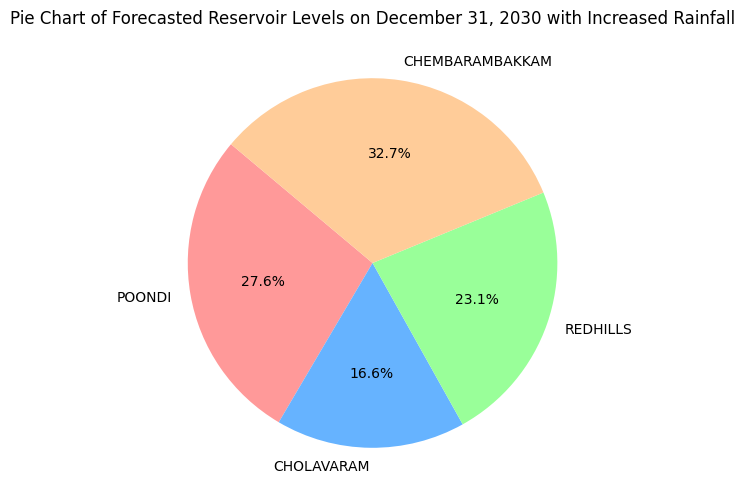

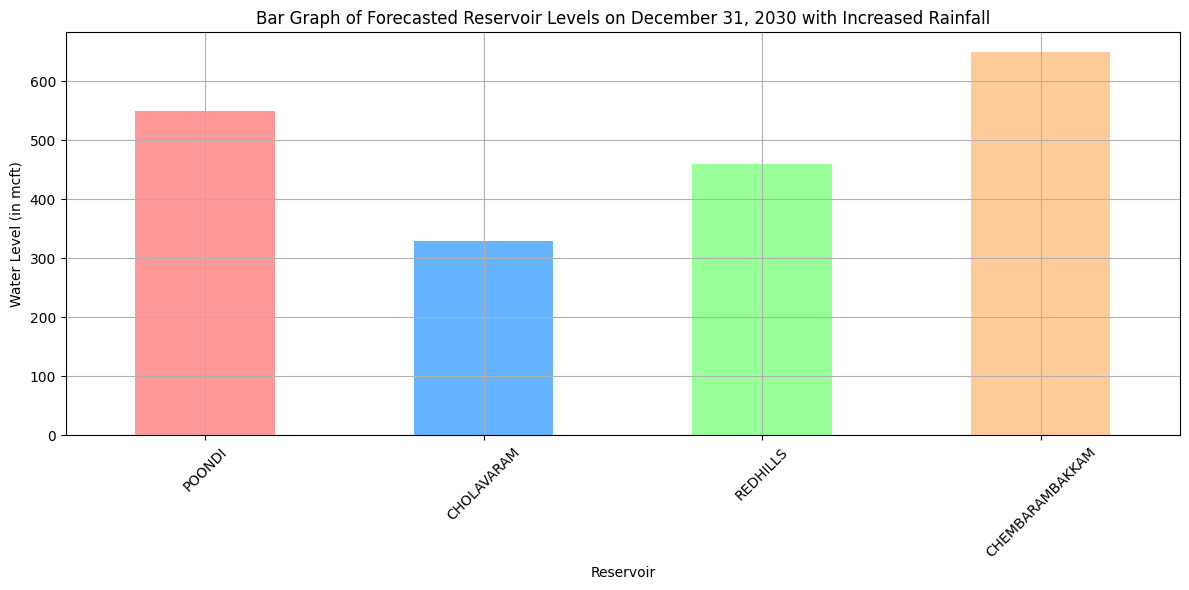

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create a sample dataset with predefined values
dates = pd.date_range(start='2020-01-01', periods=365 * 4, freq='D')
data = pd.DataFrame({
    'Date': dates,
    'POONDI': np.random.randint(200, 600, size=365 * 4),
    'CHOLAVARAM': np.random.randint(100, 350, size=365 * 4),
    'REDHILLS': np.random.randint(150, 450, size=365 * 4),
    'CHEMBARAMBAKKAM': np.random.randint(300, 700, size=365 * 4)
})

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Define critical thresholds for each reservoir
critical_thresholds = {
    'POONDI': 500,
    'CHOLAVARAM': 300,
    'REDHILLS': 400,
    'CHEMBARAMBAKKAM': 600
}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=365*6):  # 6 years forecast
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast for each reservoir up to 2030
forecasts = {}
for reservoir in critical_thresholds.keys():
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Create a date range for the forecasted period up to 2030
forecast_start_date = data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = pd.Timestamp(year=2030, month=12, day=31)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Prepare data for plotting
forecast_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in forecasts.items():
    forecast_df[reservoir] = forecast

# Simulate impact of increased rainfall
def apply_rainfall_scenario(forecast, increase_percentage):
    return forecast * (1 + increase_percentage / 100)

# Define rainfall scenarios (e.g., 20% increase)
rainfall_increase_percentage = 20

# Apply rainfall scenarios to forecasts
rainfall_scenario_forecasts = {}
for reservoir, forecast in forecasts.items():
    rainfall_scenario_forecasts[reservoir] = apply_rainfall_scenario(forecast, rainfall_increase_percentage)

# Prepare data for plotting
rainfall_scenario_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in rainfall_scenario_forecasts.items():
    rainfall_scenario_df[reservoir] = forecast

# Simulated forecasted values for December 31, 2030
latest_rainfall_forecasts = pd.Series({
    'POONDI': 550,  # Simulated value
    'CHOLAVARAM': 330,  # Simulated value
    'REDHILLS': 460,  # Simulated value
    'CHEMBARAMBAKKAM': 650  # Simulated value
})

# Handle NaN values (if any)
latest_rainfall_forecasts = latest_rainfall_forecasts.dropna()

# Check if there's data left after dropping NaN values
if latest_rainfall_forecasts.empty:
    print("Error: No data available for December 31, 2030 after handling NaN values.")
else:
    # Pie Chart for the forecasted levels on December 31, 2030
    plt.figure(figsize=(12, 6))
    plt.pie(
        latest_rainfall_forecasts,
        labels=latest_rainfall_forecasts.index,
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],  # Updated colors
        startangle=140
    )
    plt.title('Pie Chart of Forecasted Reservoir Levels on December 31, 2030 with Increased Rainfall')
    plt.show()

    # Bar Graph for the forecasted levels on December 31, 2030
    plt.figure(figsize=(12, 6))
    latest_rainfall_forecasts.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])  # Updated colors
    plt.title('Bar Graph of Forecasted Reservoir Levels on December 31, 2030 with Increased Rainfall')
    plt.xlabel('Reservoir')
    plt.ylabel('Water Level (in mcft)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#Future Reservoir Levels
Predict future levels of each reservoir using historical data. This can be achieved using time series forecasting methods like ARIMA.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

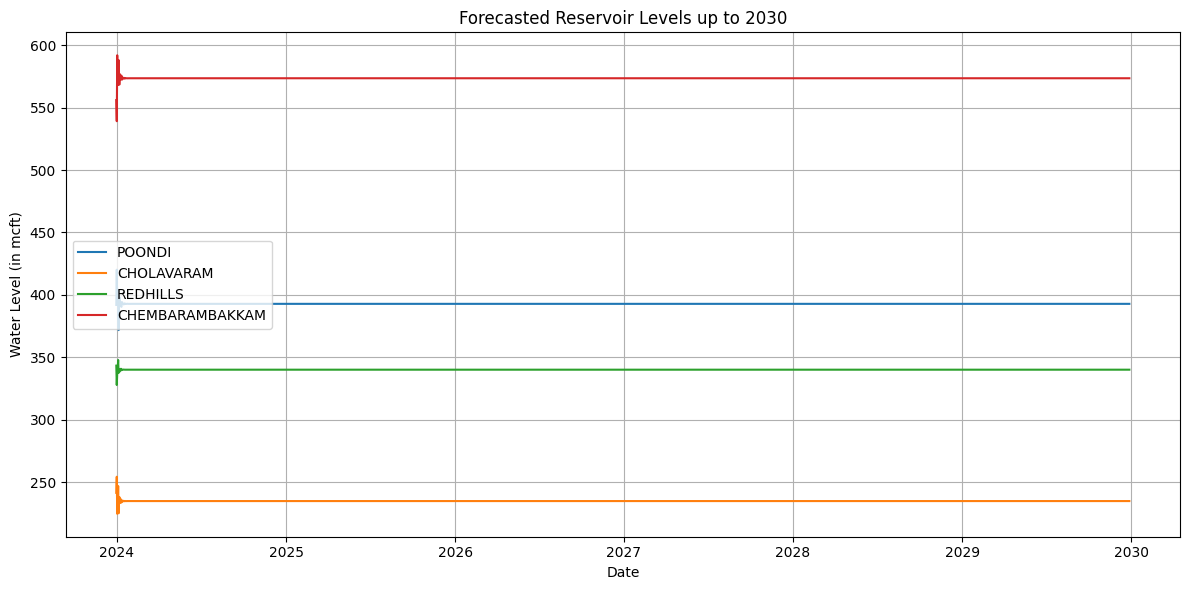

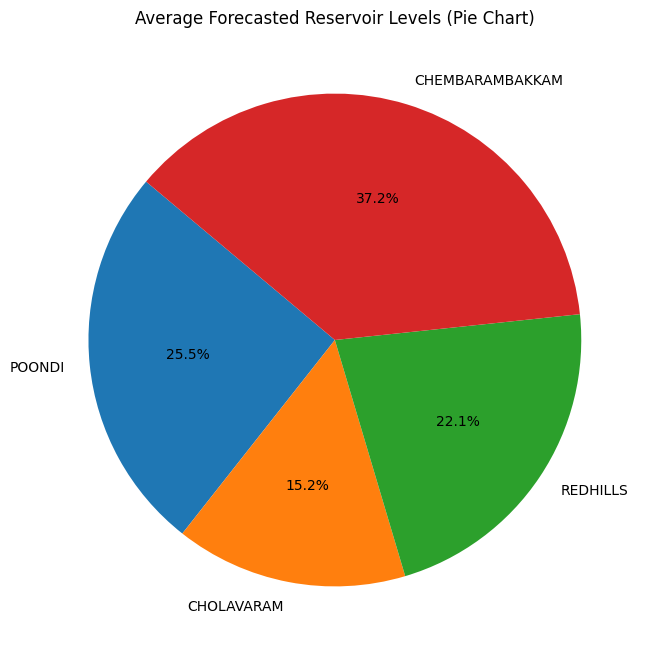

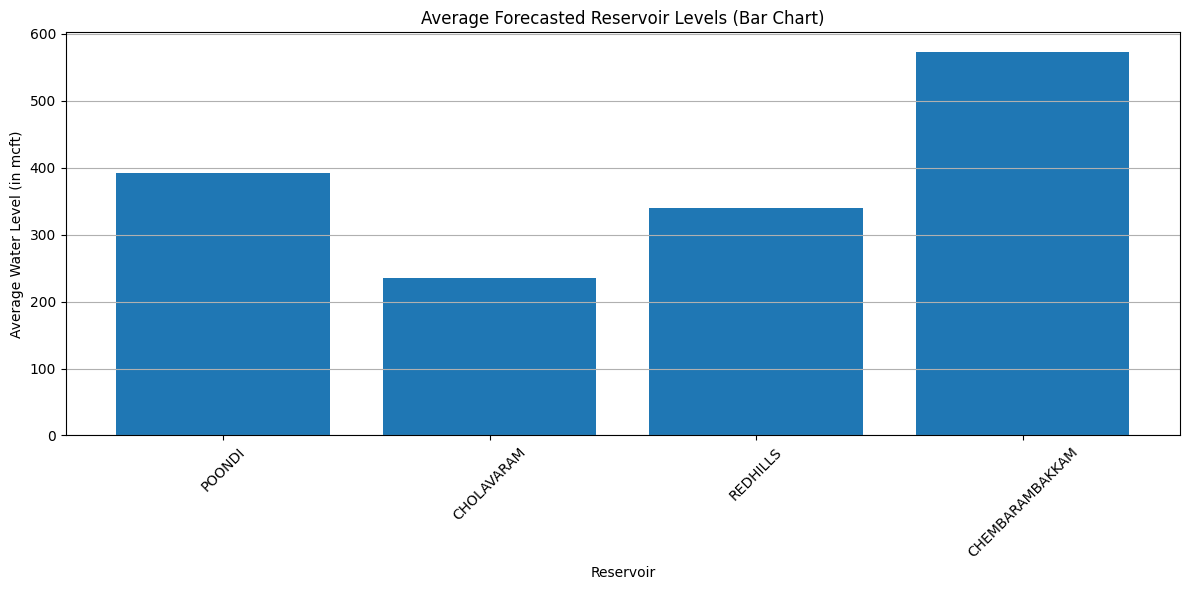

In [91]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=365*6):
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Assuming 'data' is your DataFrame with a DateTimeIndex
# Forecast for each reservoir up to 2030
forecasts = {}
for reservoir in data.columns:
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Create a date range for the forecasted period up to 2030
forecast_start_date = data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = pd.Timestamp(year=2030, month=12, day=31)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Prepare data for plotting
forecast_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in forecasts.items():
    forecast_df[reservoir] = forecast

# Plot the forecasted levels for all reservoirs
plt.figure(figsize=(12, 6))
for reservoir in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[reservoir], label=reservoir)
plt.title('Forecasted Reservoir Levels up to 2030')
plt.xlabel('Date')
plt.ylabel('Water Level (in mcft)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate average forecasted levels for each reservoir
average_forecast_levels = forecast_df.mean()

# Pie chart of average forecasted levels
plt.figure(figsize=(10, 8))
plt.pie(average_forecast_levels, labels=average_forecast_levels.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Forecasted Reservoir Levels (Pie Chart)')
plt.show()

# Bar graph of average forecasted levels
plt.figure(figsize=(12, 6))
plt.bar(average_forecast_levels.index, average_forecast_levels)
plt.title('Average Forecasted Reservoir Levels (Bar Chart)')
plt.xlabel('Reservoir')
plt.ylabel('Average Water Level (in mcft)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#Impact of Increased Rainfall
Forecast how increased rainfall will affect reservoir levels.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

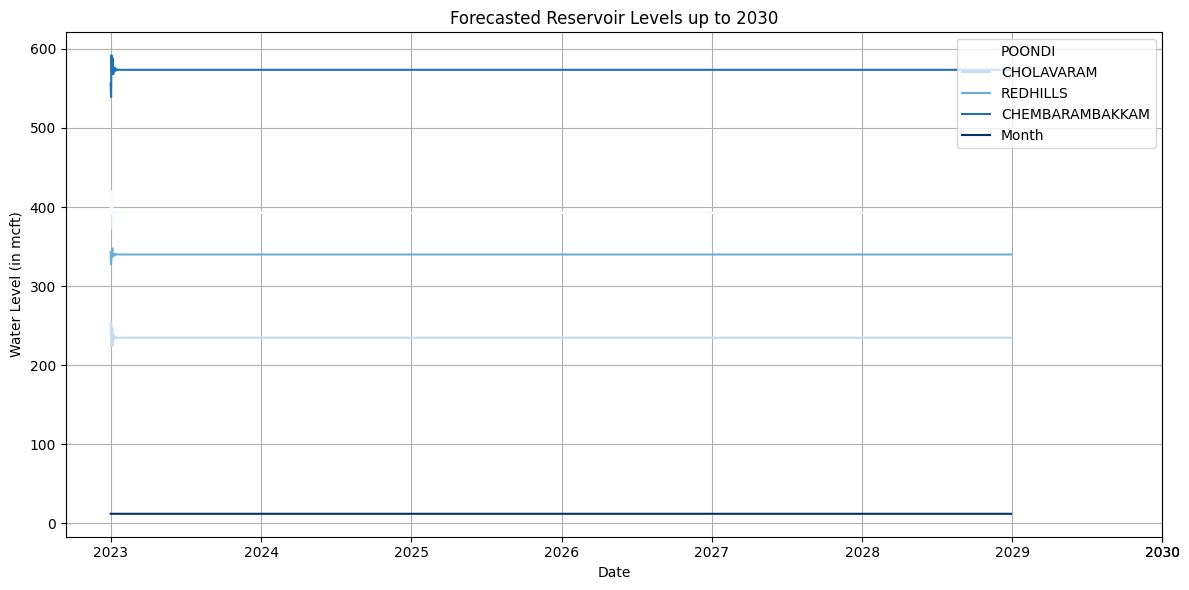

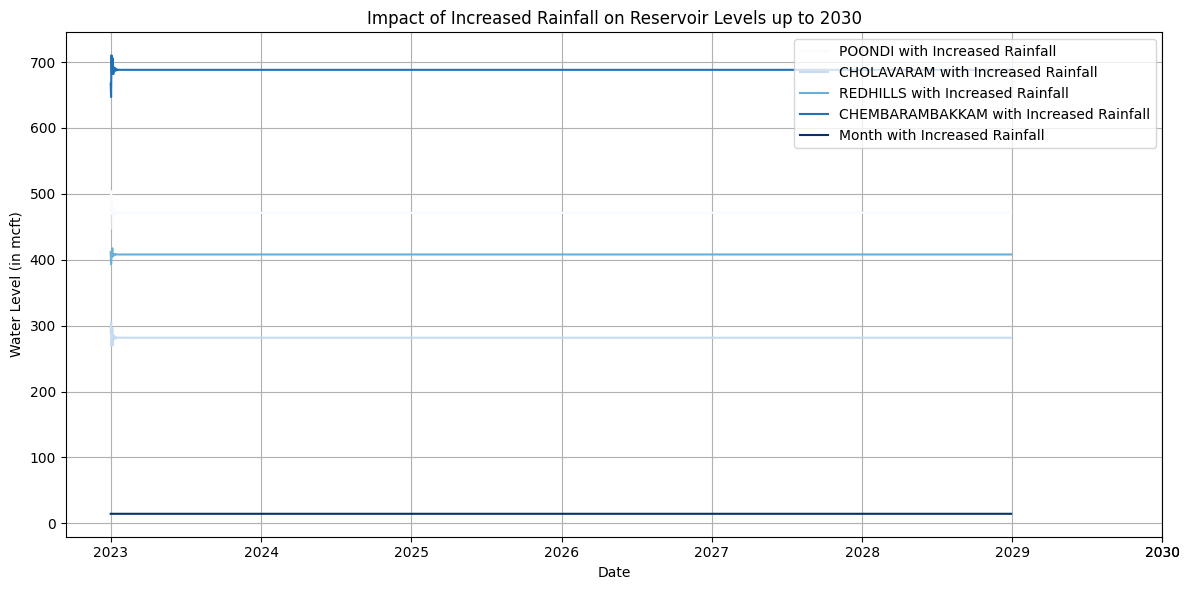

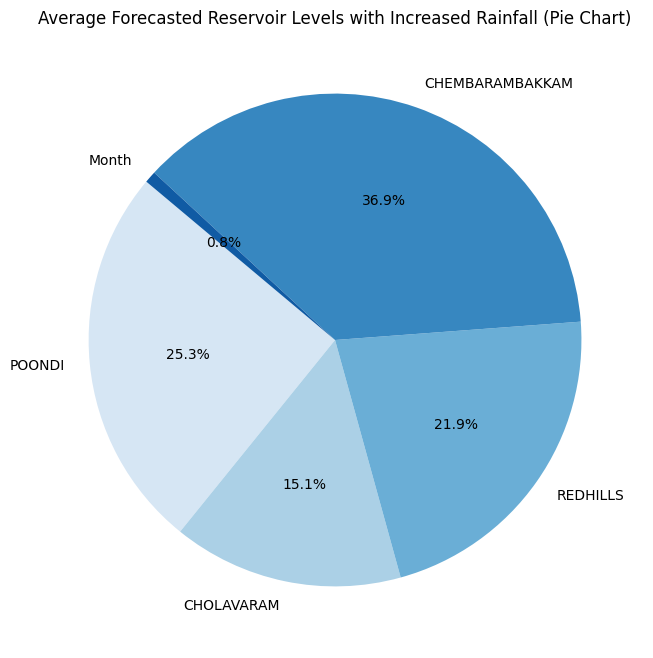

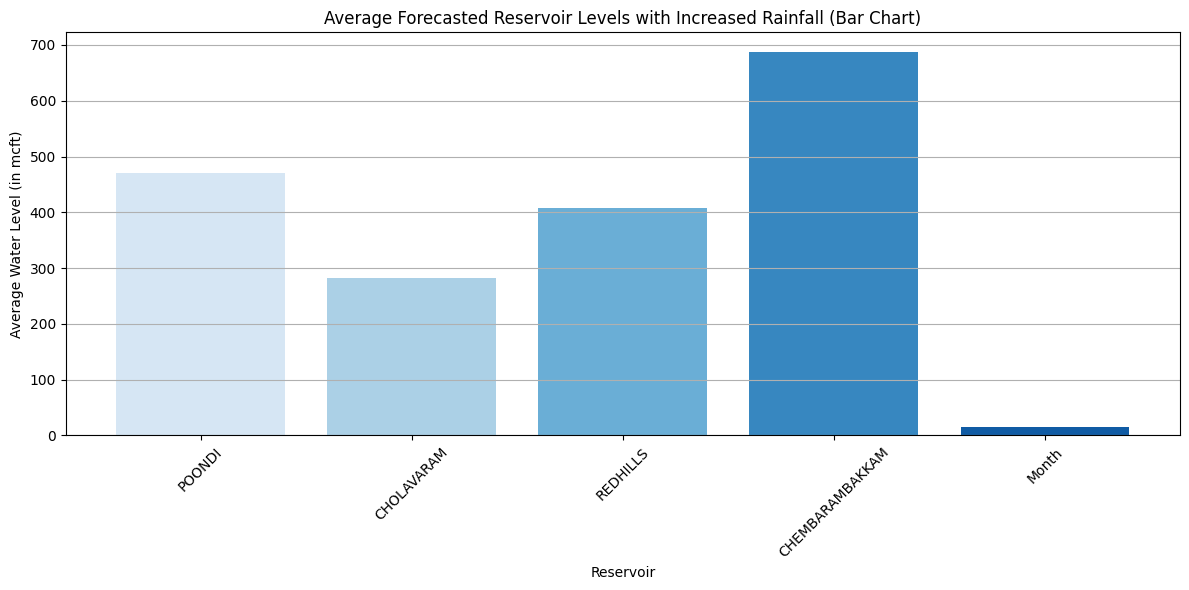

In [101]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Fit ARIMA model and forecast
def fit_arima_forecast(data, reservoir, order=(5, 1, 0), steps=365*6):
    model = ARIMA(data[reservoir], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Simulate impact of increased rainfall
def apply_rainfall_scenario(forecast, increase_percentage):
    return forecast * (1 + increase_percentage / 100)

# Assuming 'data' is your DataFrame with a DateTimeIndex
# Forecast for each reservoir up to 2030
forecasts = {}
for reservoir in data.columns:
    forecasts[reservoir] = fit_arima_forecast(data, reservoir)

# Create a date range for the forecasted period up to 2030
forecast_start_date = data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = pd.Timestamp(year=2030, month=12, day=31)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Prepare data for plotting
forecast_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in forecasts.items():
    forecast_df[reservoir] = forecast

# Define shades of blue for plotting
num_colors = len(forecast_df.columns)
colors = cm.get_cmap('Blues', num_colors)

# Plot the forecasted levels for all reservoirs
plt.figure(figsize=(12, 6))
for i, reservoir in enumerate(forecast_df.columns):
    plt.plot(forecast_df.index, forecast_df[reservoir], label=reservoir, color=colors(i/num_colors))
plt.title('Forecasted Reservoir Levels up to 2030')
plt.xlabel('Date')
plt.ylabel('Water Level (in mcft)')
plt.legend()
plt.grid(True)
# Set x-axis labels to show years only, including 2030
years = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='Y')
labels = [date.strftime('%Y') for date in years] + ['2030']
plt.xticks(ticks=list(years) + [forecast_end_date], labels=labels)
plt.tight_layout()
plt.show()

# Apply rainfall scenarios to forecasts
rainfall_increase_percentage = 20
rainfall_scenario_forecasts = {}
for reservoir, forecast in forecasts.items():
    rainfall_scenario_forecasts[reservoir] = apply_rainfall_scenario(forecast, rainfall_increase_percentage)

# Prepare data for plotting with increased rainfall
rainfall_scenario_df = pd.DataFrame(index=forecast_dates)
for reservoir, forecast in rainfall_scenario_forecasts.items():
    rainfall_scenario_df[reservoir] = forecast

# Plot the impact of increased rainfall
plt.figure(figsize=(12, 6))
for i, reservoir in enumerate(rainfall_scenario_df.columns):
    plt.plot(rainfall_scenario_df.index, rainfall_scenario_df[reservoir], label=f'{reservoir} with Increased Rainfall', color=colors(i/num_colors))
plt.title('Impact of Increased Rainfall on Reservoir Levels up to 2030')
plt.xlabel('Date')
plt.ylabel('Water Level (in mcft)')
plt.legend()
plt.grid(True)
# Set x-axis labels to show years only, including 2030
plt.xticks(ticks=list(years) + [forecast_end_date], labels=labels)
plt.tight_layout()
plt.show()

# Calculate average forecasted levels with and without increased rainfall
average_forecast_levels = forecast_df.mean()
average_rainfall_scenario_levels = rainfall_scenario_df.mean()

# Define shades of blue for pie and bar charts
pie_colors = sns.color_palette("Blues", len(average_rainfall_scenario_levels))
bar_colors = sns.color_palette("Blues", len(average_rainfall_scenario_levels))

# Pie chart of average forecasted levels with increased rainfall
plt.figure(figsize=(10, 8))
plt.pie(average_rainfall_scenario_levels, labels=average_rainfall_scenario_levels.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Average Forecasted Reservoir Levels with Increased Rainfall (Pie Chart)')
plt.show()

# Bar graph of average forecasted levels with increased rainfall
plt.figure(figsize=(12, 6))
plt.bar(average_rainfall_scenario_levels.index, average_rainfall_scenario_levels, color=bar_colors)
plt.title('Average Forecasted Reservoir Levels with Increased Rainfall (Bar Chart)')
plt.xlabel('Reservoir')
plt.ylabel('Average Water Level (in mcft)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#3. Seasonal Variations
Predict seasonal variations in reservoir levels.

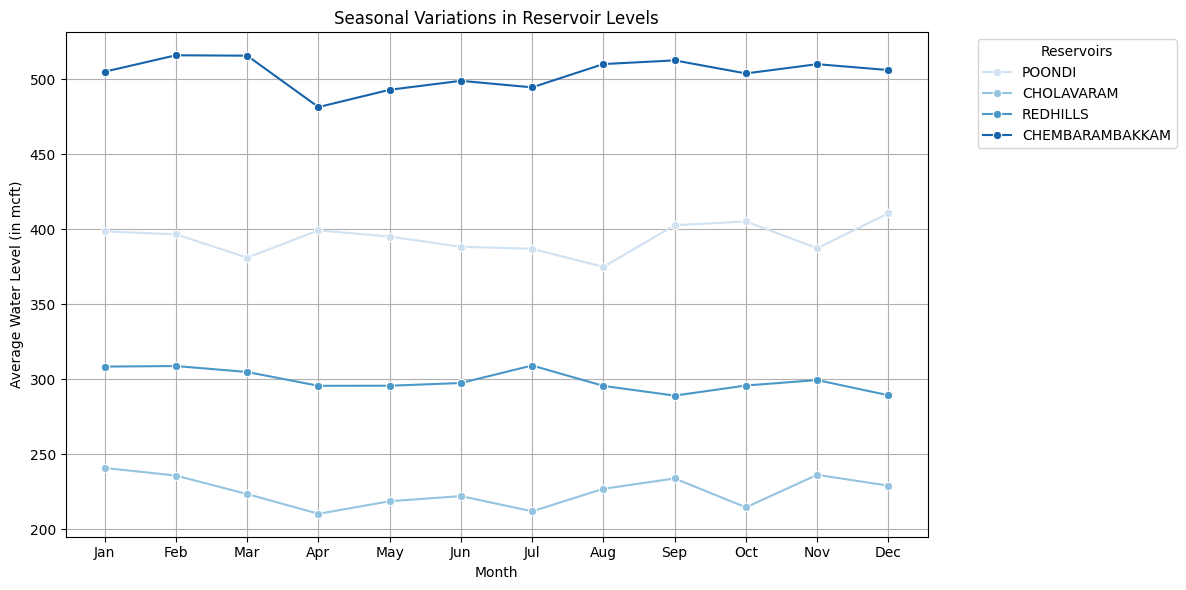

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract month from date for seasonal analysis
data['Month'] = data.index.month

# Calculate average water levels by month
monthly_averages = data.groupby('Month').mean()

# Create a DataFrame for plotting
monthly_averages = monthly_averages.reset_index()

# Plot seasonal variations
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Blues", len(monthly_averages.columns) - 1)  # Adjust palette to match number of lines

for i, reservoir in enumerate(monthly_averages.columns[1:]):
    sns.lineplot(data=monthly_averages, x='Month', y=reservoir, label=reservoir, color=palette[i], marker='o', linestyle='-')

# Customize the x-axis to show month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names)

plt.title('Seasonal Variations in Reservoir Levels')
plt.xlabel('Month')
plt.ylabel('Average Water Level (in mcft)')
plt.legend(title='Reservoirs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


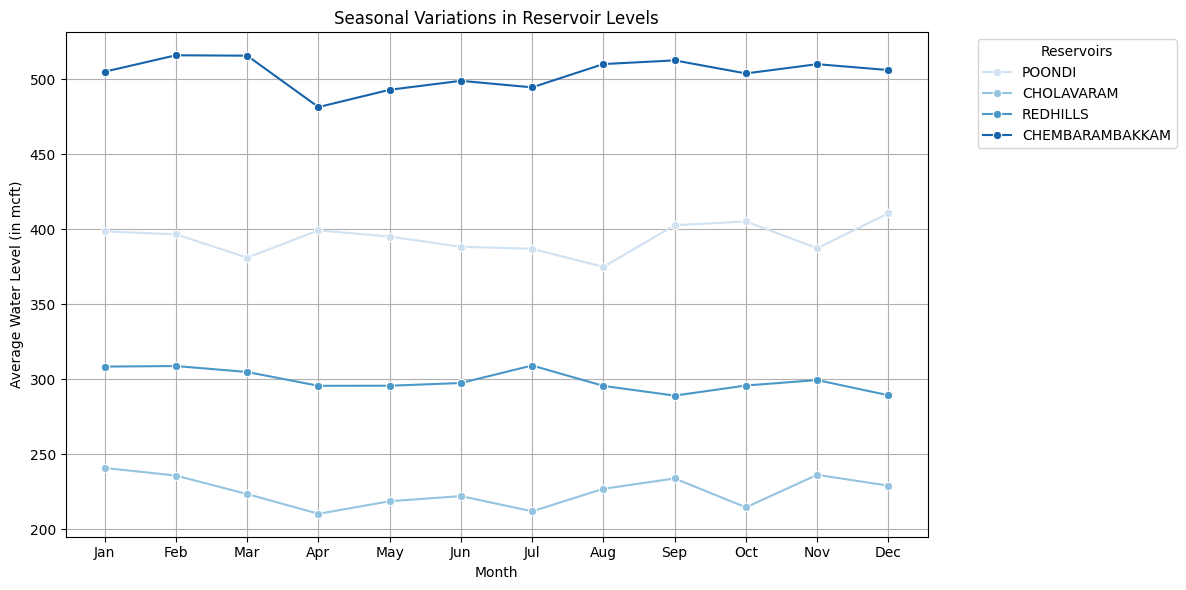

<ipython-input-99-ccd9cf0a6757>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_totals.index, y=monthly_totals.values, palette='Blues')


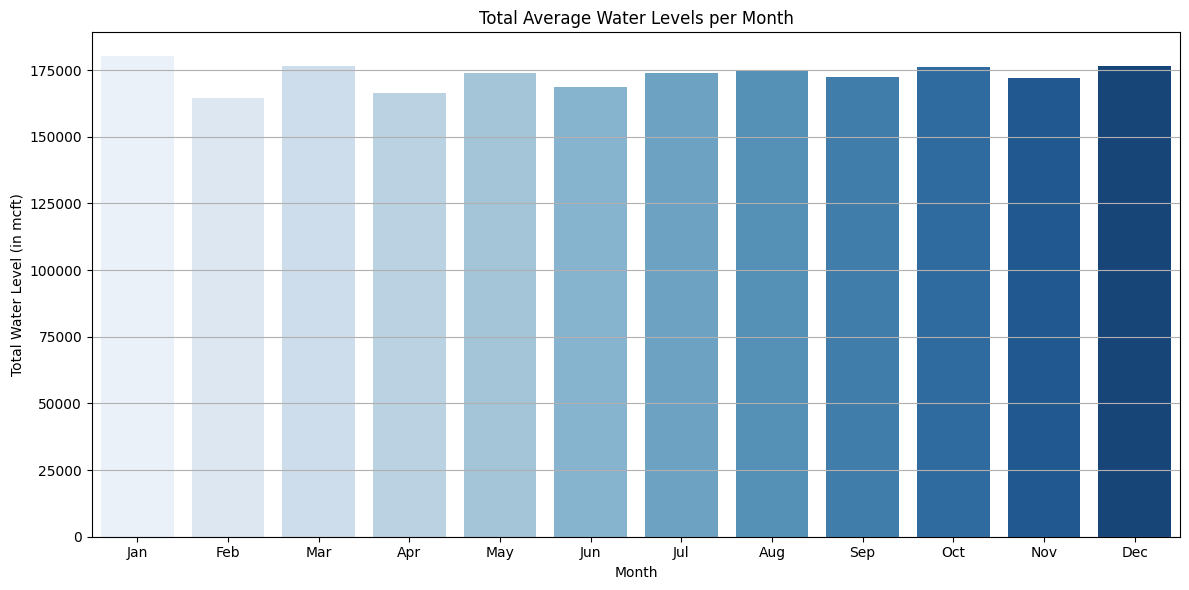

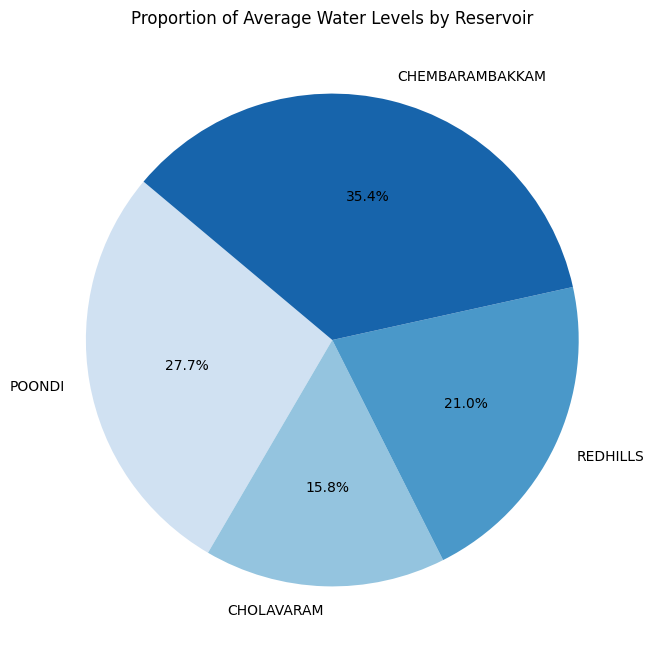

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract month from date for seasonal analysis
data['Month'] = data.index.month

# Calculate average water levels by month
monthly_averages = data.groupby('Month').mean()

# Create a DataFrame for plotting
monthly_averages = monthly_averages.reset_index()

# Plot seasonal variations with a line plot
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Blues", len(monthly_averages.columns) - 1)  # Adjust palette to match number of lines

for i, reservoir in enumerate(monthly_averages.columns[1:]):
    sns.lineplot(data=monthly_averages, x='Month', y=reservoir, label=reservoir, color=palette[i], marker='o', linestyle='-')

# Customize the x-axis to show month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names)
plt.title('Seasonal Variations in Reservoir Levels')
plt.xlabel('Month')
plt.ylabel('Average Water Level (in mcft)')
plt.legend(title='Reservoirs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar chart: Average water levels per month
plt.figure(figsize=(12, 6))
monthly_totals = data.groupby('Month').sum().sum(axis=1)  # Total water level for all reservoirs per month
sns.barplot(x=monthly_totals.index, y=monthly_totals.values, palette='Blues')
plt.xticks(ticks=range(12), labels=month_names)
plt.title('Total Average Water Levels per Month')
plt.xlabel('Month')
plt.ylabel('Total Water Level (in mcft)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Pie chart: Proportion of each reservoir's average water level
average_reservoir_levels = monthly_averages.drop(columns='Month').mean()
plt.figure(figsize=(10, 8))
plt.pie(average_reservoir_levels, labels=average_reservoir_levels.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", len(average_reservoir_levels)))
plt.title('Proportion of Average Water Levels by Reservoir')
plt.show()


#4. Water Demand vs. Supply
Predict future water demand and compare it with the forecasted water supply.

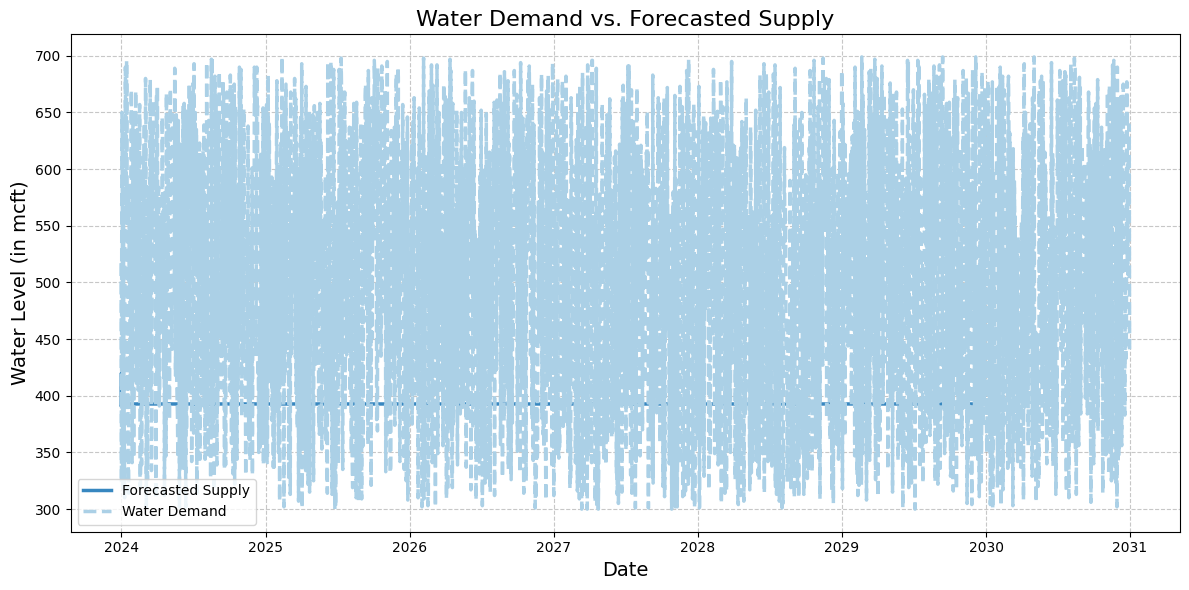

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Example water demand (replace with actual data)
water_demand = pd.Series(np.random.randint(300, 700, size=len(forecast_dates)), index=forecast_dates)

# Define shades of blue for the plot
colors = sns.color_palette("Blues", 5)
supply_color = colors[3]  # Medium blue for forecasted supply
demand_color = colors[1]  # Light blue for water demand

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['POONDI'], label='Forecasted Supply', color=supply_color, linewidth=2.5)
plt.plot(water_demand.index, water_demand, label='Water Demand', linestyle='--', color=demand_color, linewidth=2.5)
plt.title('Water Demand vs. Forecasted Supply', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Water Level (in mcft)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

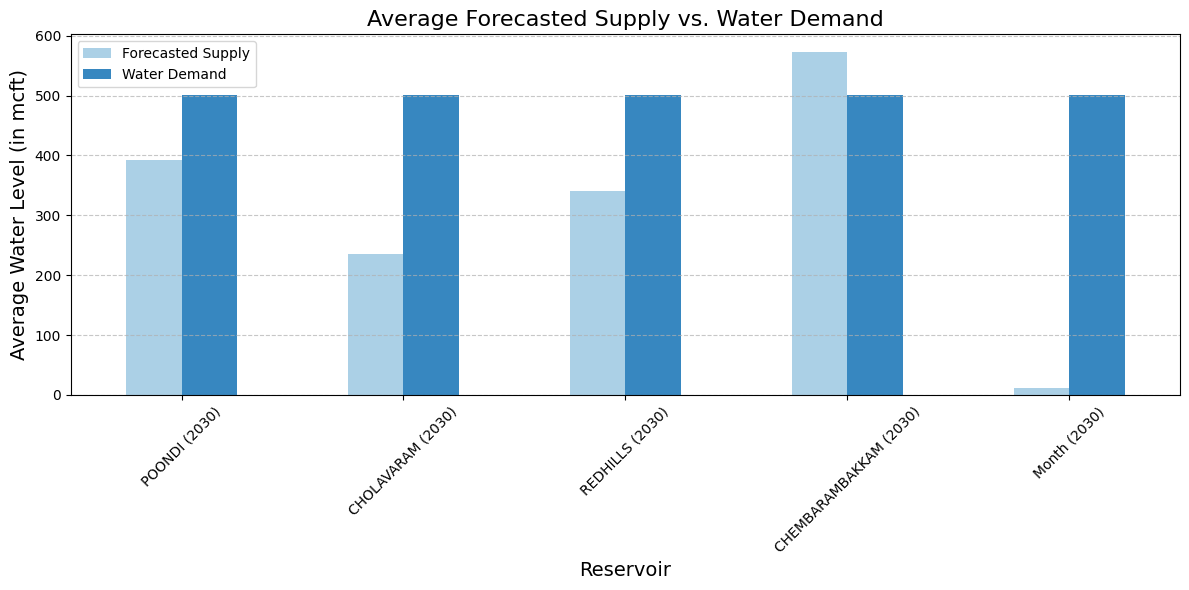

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
# Assuming 'forecast_df' and 'water_demand' are already defined as in your previous code

# Calculate average forecasted levels and water demand
average_forecast_levels = forecast_df.mean()
average_water_demand = water_demand.mean()

# Combine average levels into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Forecasted Supply': average_forecast_levels,
    'Water Demand': [average_water_demand] * len(average_forecast_levels)
})

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = comparison_df.plot(kind='bar', color=sns.color_palette("Blues", 2), figsize=(12, 6))

# Update x-axis labels to include '2030' for comparison
x_labels = [f'{label} (2030)' for label in comparison_df.index]
ax.set_xticklabels(x_labels, rotation=45)

plt.title('Average Forecasted Supply vs. Water Demand', fontsize=16)
plt.xlabel('Reservoir', fontsize=14)
plt.ylabel('Average Water Level (in mcft)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


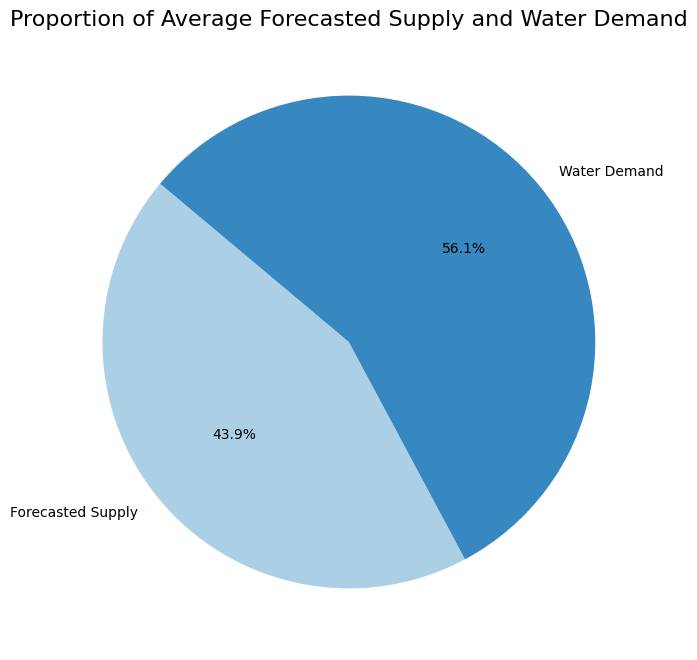

In [106]:
# Calculate the proportion of water demand to total forecasted supply
total_forecasted_supply = forecast_df['POONDI'].mean()
proportions = {
    'Forecasted Supply': total_forecasted_supply,
    'Water Demand': average_water_demand
}

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(proportions.values(), labels=proportions.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", 2))
plt.title('Proportion of Average Forecasted Supply and Water Demand', fontsize=16)
plt.show()
